In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
%matplotlib notebook

### import price

In [4]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_price07_18.csv'a
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_price = pd.read_csv(StringIO(csv_string))
df_price.index = df_price['Unnamed: 0']
df_price = df_price.drop('Unnamed: 0', axis=1)
df_price.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_price = df_price.T
df_price.index = pd.to_datetime(df_price.index)
print(df_price.shape)
df_price.head()

(3020, 388)


date        ORCL_ORACLE CORP  MSFT_MICROSOFT CORP  \
2007-01-03             17.51                29.86   
2007-01-04             17.68                29.81   
2007-01-05             17.64                29.64   
2007-01-08             17.86                29.93   
2007-01-09             17.82                29.96   

date        TROW_T ROWE PRICE GROUP INC  HON_HONEYWELL INTERNATIONAL INC  \
2007-01-03                        45.75                            45.10   
2007-01-04                        46.15                            45.08   
2007-01-05                        46.06                            44.65   
2007-01-08                        46.90                            44.92   
2007-01-09                        47.09                            45.24   

date        ADM_ARCHER DANIELS MIDLAND CO  FISV_FISERV INC  CERN_CERNER CORP  \
2007-01-03                          32.06            51.57             45.20   
2007-01-04                          31.88            52.66             46.50   
2007-01-05                          31.83            52.46             45.46   
2007-01-08                          31.99            52.59             45.30   
2007-01-09                          31.21            52.75             45.34   

date        KO_COCA COLA CO  CDNS_CADENCE DESIGN SYSTEMS INC  \
2007-01-03            48.58                            18.15   
2007-01-04            48.60                            18.02   
2007-01-05            48.26                            18.06   
2007-01-08            48.57                            18.03   
2007-01-09            48.61                            18.13   

date        ED_CONSOLIDATED EDISON INC  ...  ROST_ROSS STORES INC  \
2007-01-03                       48.39  ...                 30.49   
2007-01-04                       48.31  ...                 31.21   
2007-01-05                       47.63  ...                 31.41   
2007-01-08                       47.56  ...                 31.59   
2007-01-09                       47.70  ...                 31.98   

date        IPGP_I P G PHOTONICS CORP  UNH_UNITED HEALTHCARE  \
2007-01-03                      24.09                  52.57   
2007-01-04                      24.09                  52.91   
2007-01-05                      24.82                  52.55   
2007-01-08                      24.66                  53.32   
2007-01-09                      25.70                  52.68   

date        UA_UNDER ARMOUR INC  MKC_MCCORMICK & CO INC  LEN_LENNAR CORP  \
2007-01-03                49.55                   38.40            50.63   
2007-01-04                49.23                   38.22            50.09   
2007-01-05                48.36                   37.99            49.66   
2007-01-08                48.99                   37.90            48.72   
2007-01-09                48.87                   38.03            48.78   

date        TAP_MOLSON COORS BREWING CO  STZ_CONSTELLATION BRANDS INC  \
2007-01-03                        78.02                        29.140   
2007-01-04                        76.55                        25.493   
2007-01-05                        76.00                        24.410   
2007-01-08                        76.17                        24.710   
2007-01-09                        75.59                        24.730   

date        CBS_CBS CORP  CMG_CHIPOTLE MEXICAN GRILL INC  
2007-01-03         31.60                           56.41  
2007-01-04         31.33                           55.38  
2007-01-05         30.91                           55.00  
2007-01-08         31.05                           56.05  
2007-01-09         30.90                           56.45  

[5 rows x 388 columns]

### what is the distribution of the sigmas?

In [26]:
sigmas = []
for symbol in df_price.columns:
    temp_sigma = round(df_price[symbol].describe()['std'], 4)
    sigmas.append(temp_sigma)

<IPython.core.display.Javascript object>


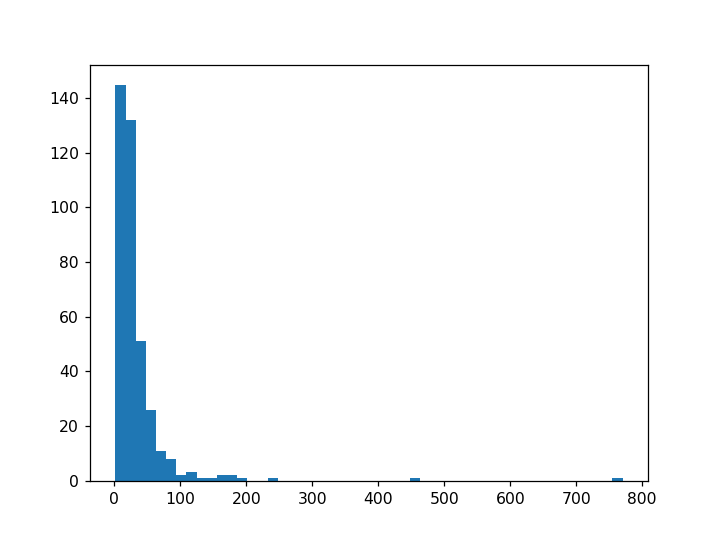

(array([145., 132.,  51.,  26.,  11.,   8.,   2.,   3.,   1.,   1.,   2.,
          2.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.5016 ,  16.87797,  32.25434,  47.63071,  63.00708,  78.38345,
         93.75982, 109.13619, 124.51256, 139.88893, 155.2653 , 170.64167,
        186.01804, 201.39441, 216.77078, 232.14715, 247.52352, 262.89989,
        278.27626, 293.65263, 309.029  , 324.40537, 339.78174, 355.15811,
        370.53448, 385.91085, 401.28722, 416.66359, 432.03996, 447.41633,
        462.7927 , 478.16907, 493.54544, 508.92181, 524.29818, 539.67455,
        555.05092, 570.42729, 585.80366, 601.18003, 616.5564 , 631.93277,
        647.30914, 662.68551, 678.06188, 693.43825, 708.81462, 724.19099,
        739.56736, 754.94373, 770.3201 ]),
 <a list of 50 Patch ob

In [35]:
plt.hist(sigmas, bins=50)

### Worst dates

In [5]:
worst_dates_dow = pd.to_datetime(['2008-10-15', '2008-12-1', '2008-10-9', '2008-9-29', '2011-8-8'])
#worst_dates_sp = 
worst_dates_dow

DatetimeIndex(['2008-10-15', '2008-12-01', '2008-10-09', '2008-09-29',
               '2011-08-08'],
              dtype='datetime64[ns]', freq=None)









Batch 0


<IPython.core.display.Javascript object>


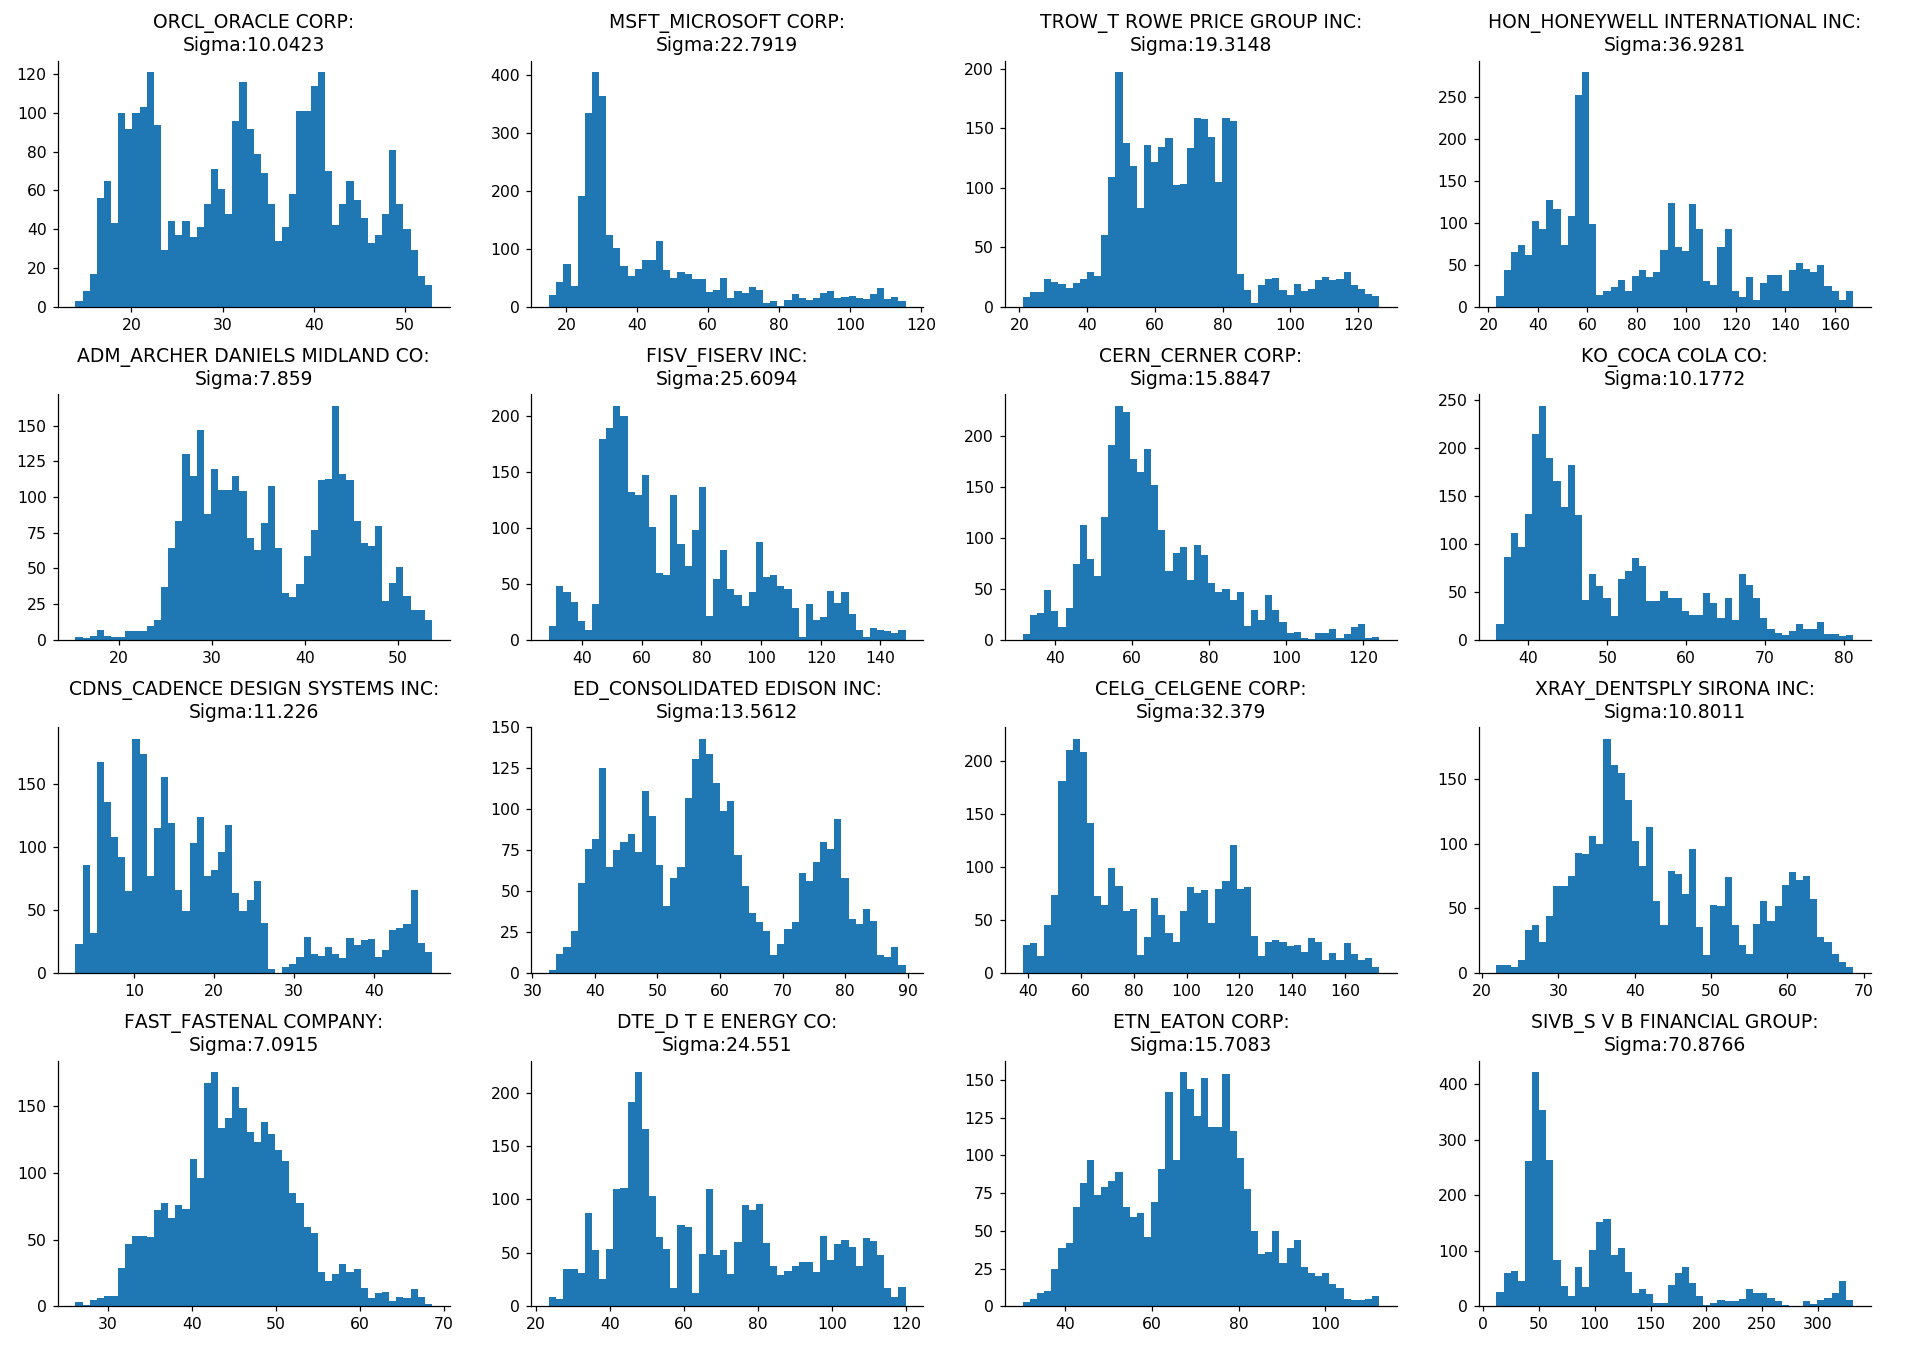









Batch 1


<IPython.core.display.Javascript object>


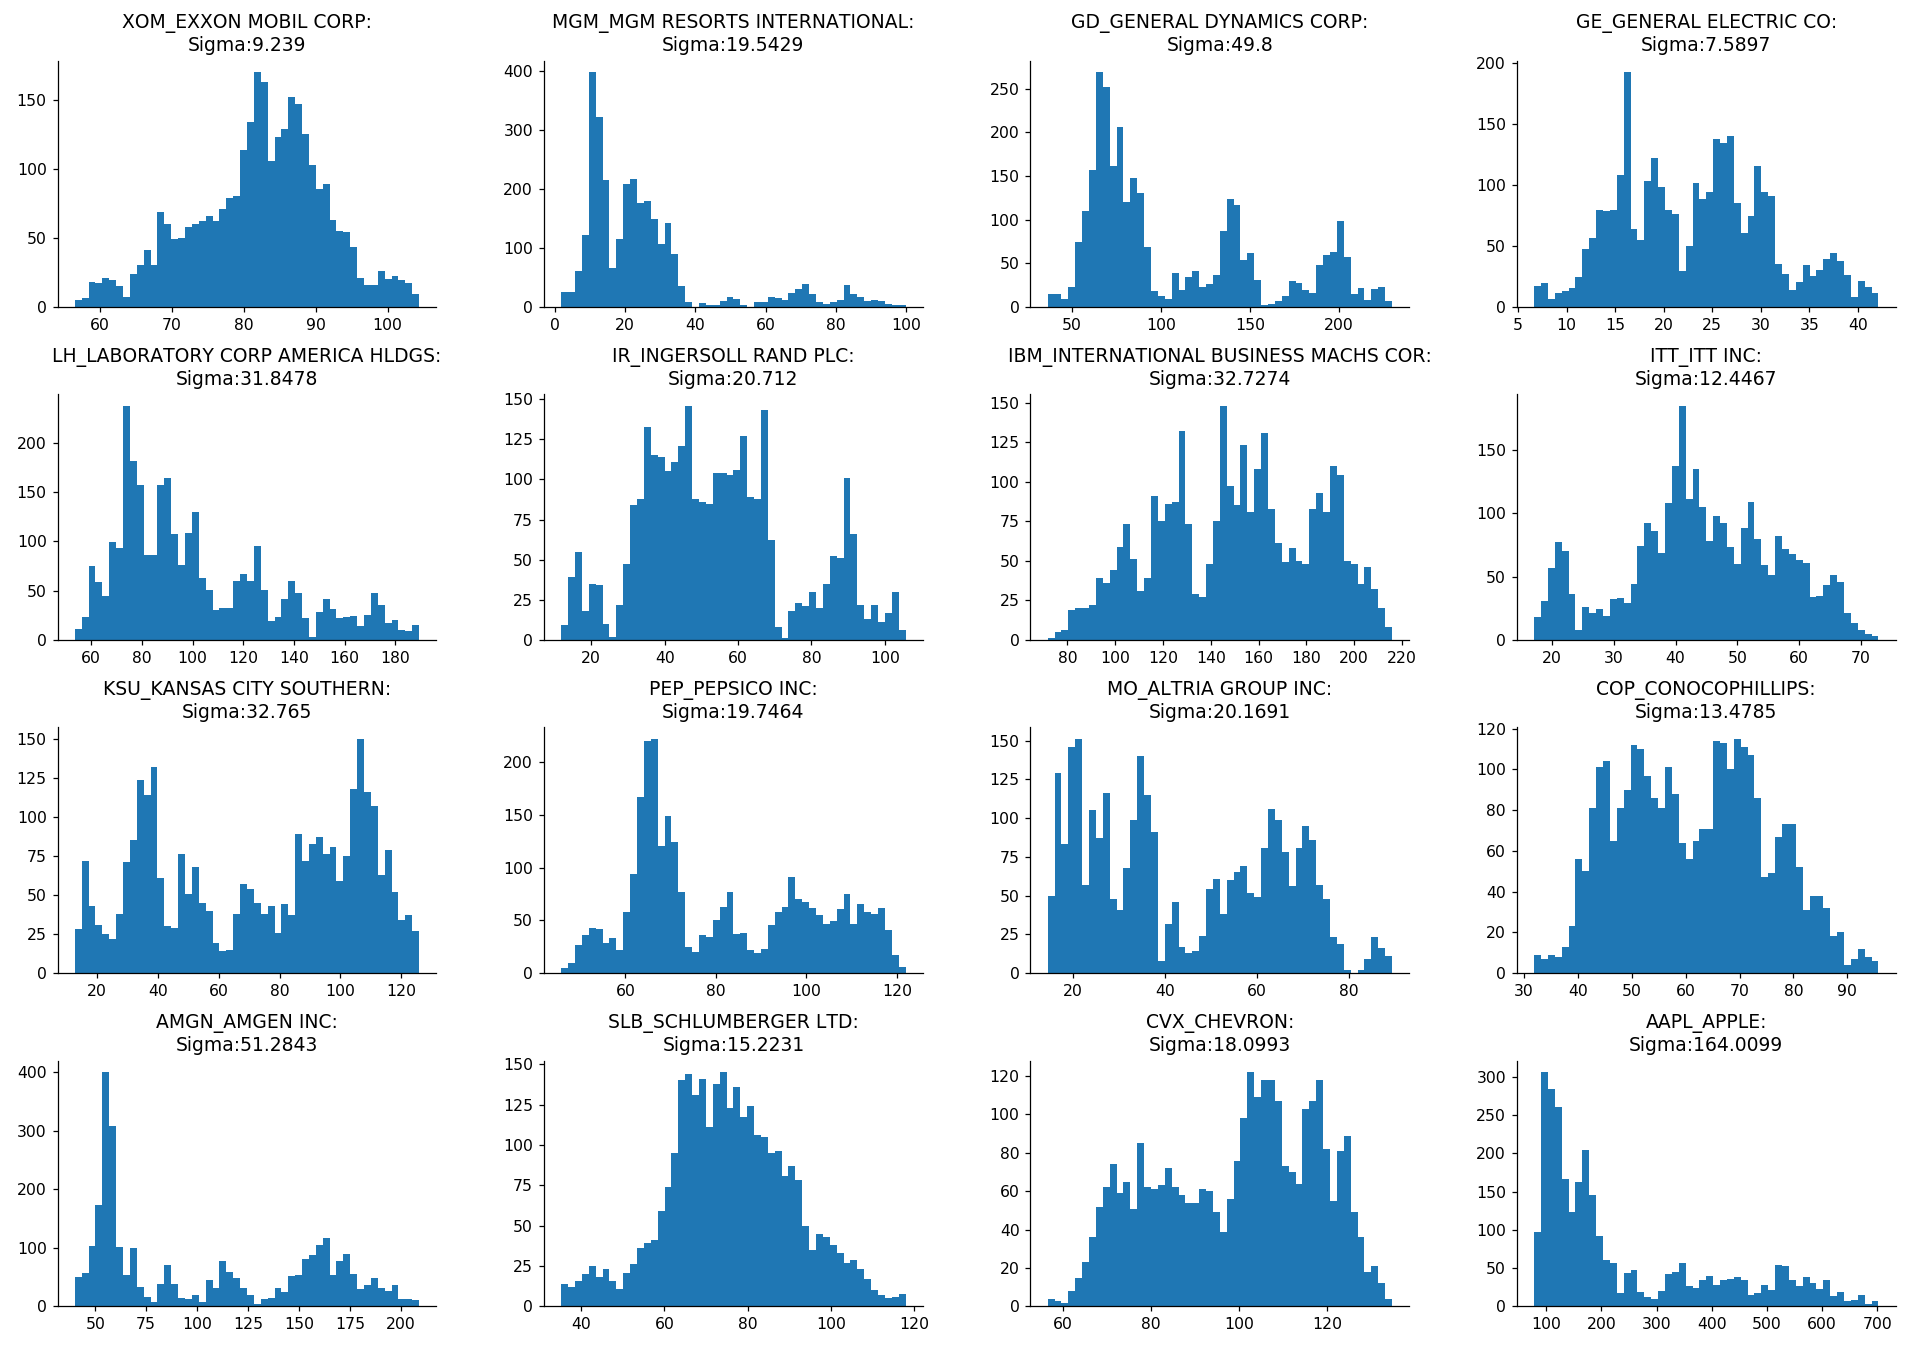









Batch 2


<IPython.core.display.Javascript object>


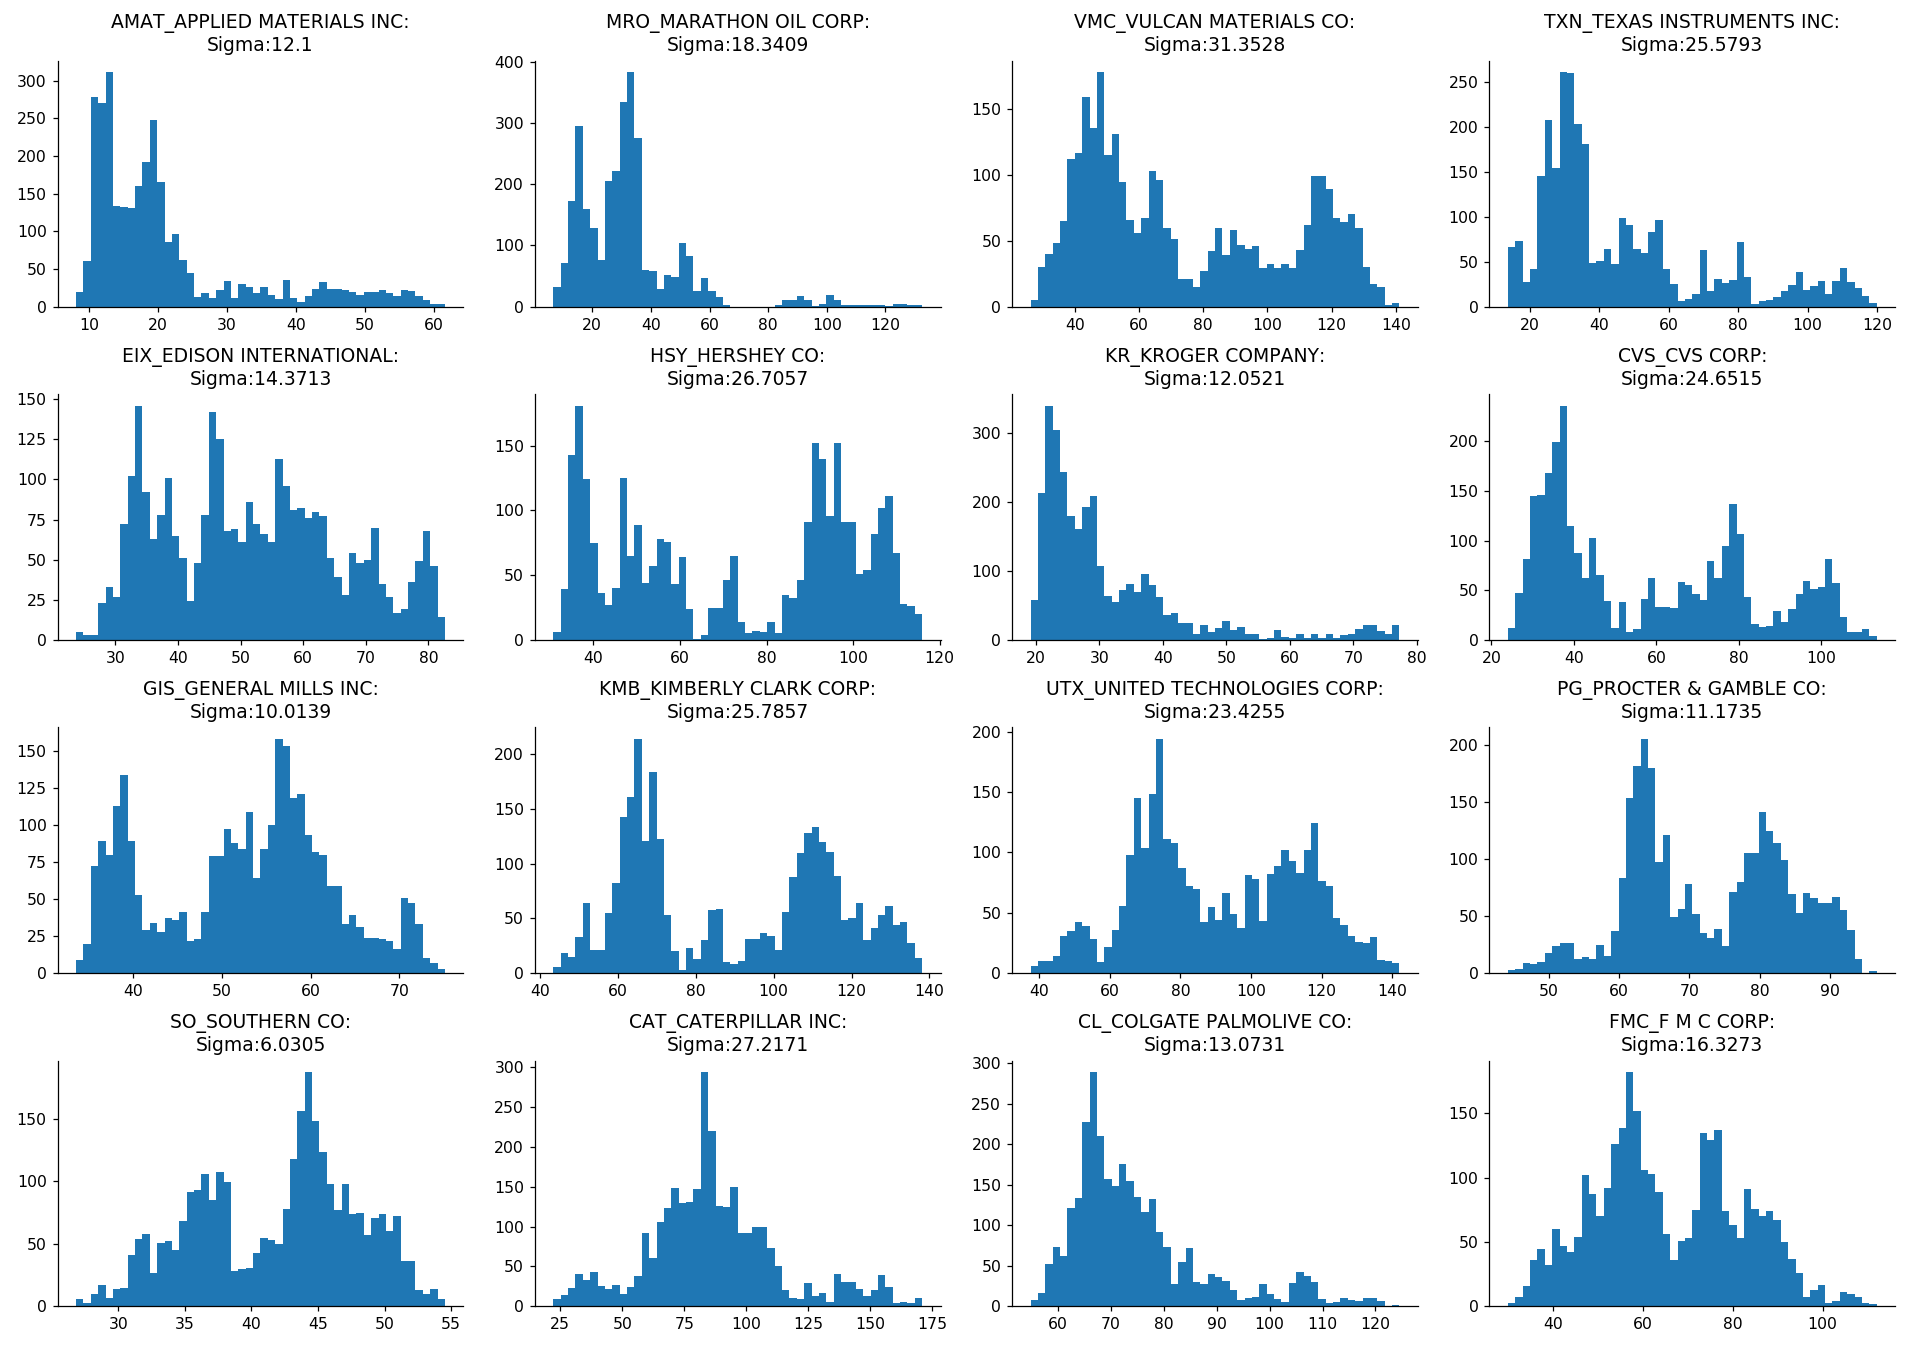









Batch 3


<IPython.core.display.Javascript object>


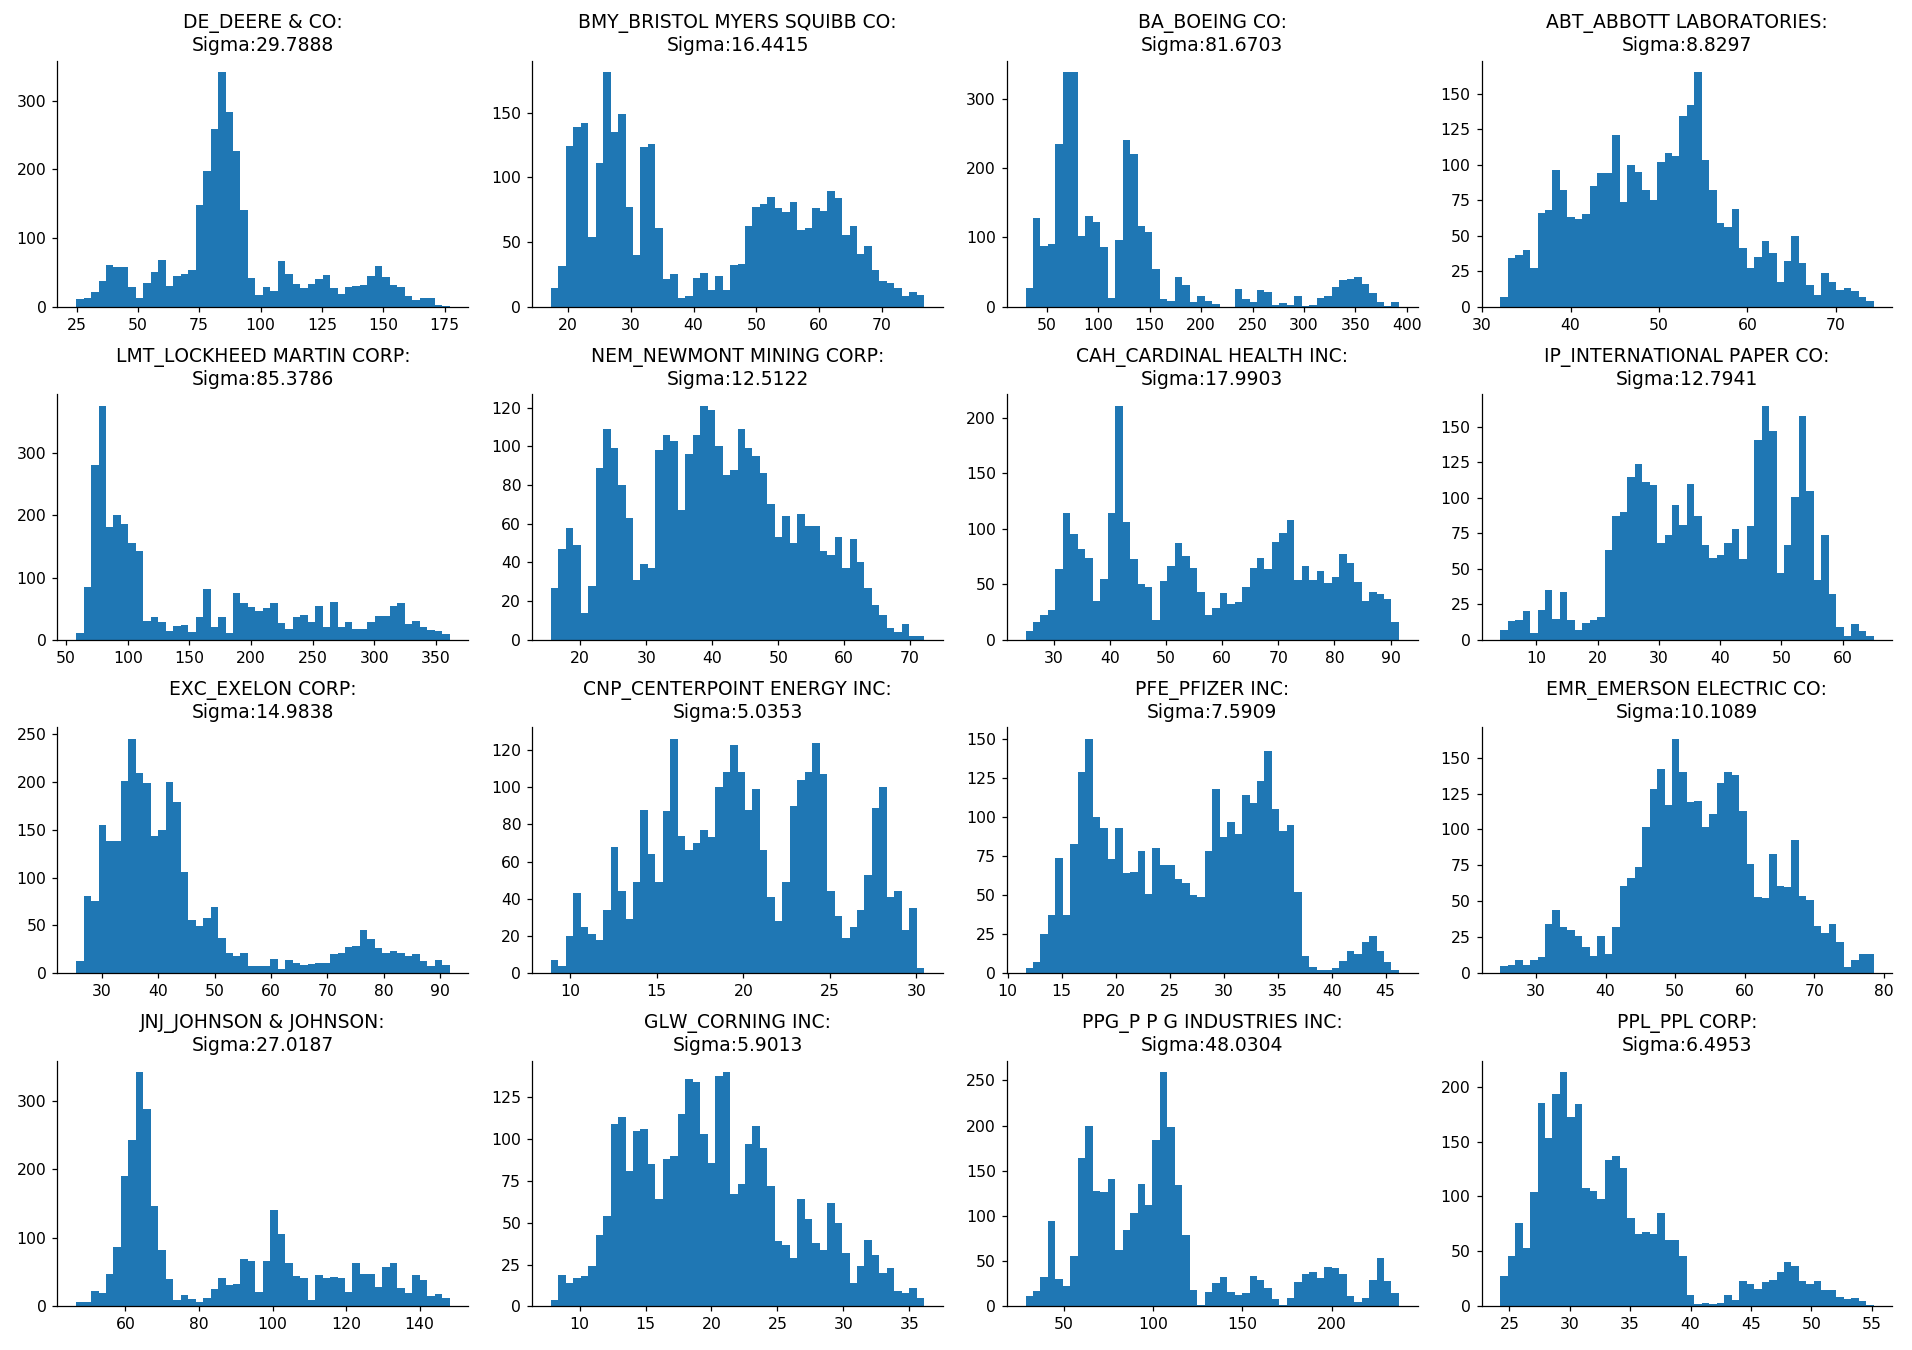









Batch 4


<IPython.core.display.Javascript object>


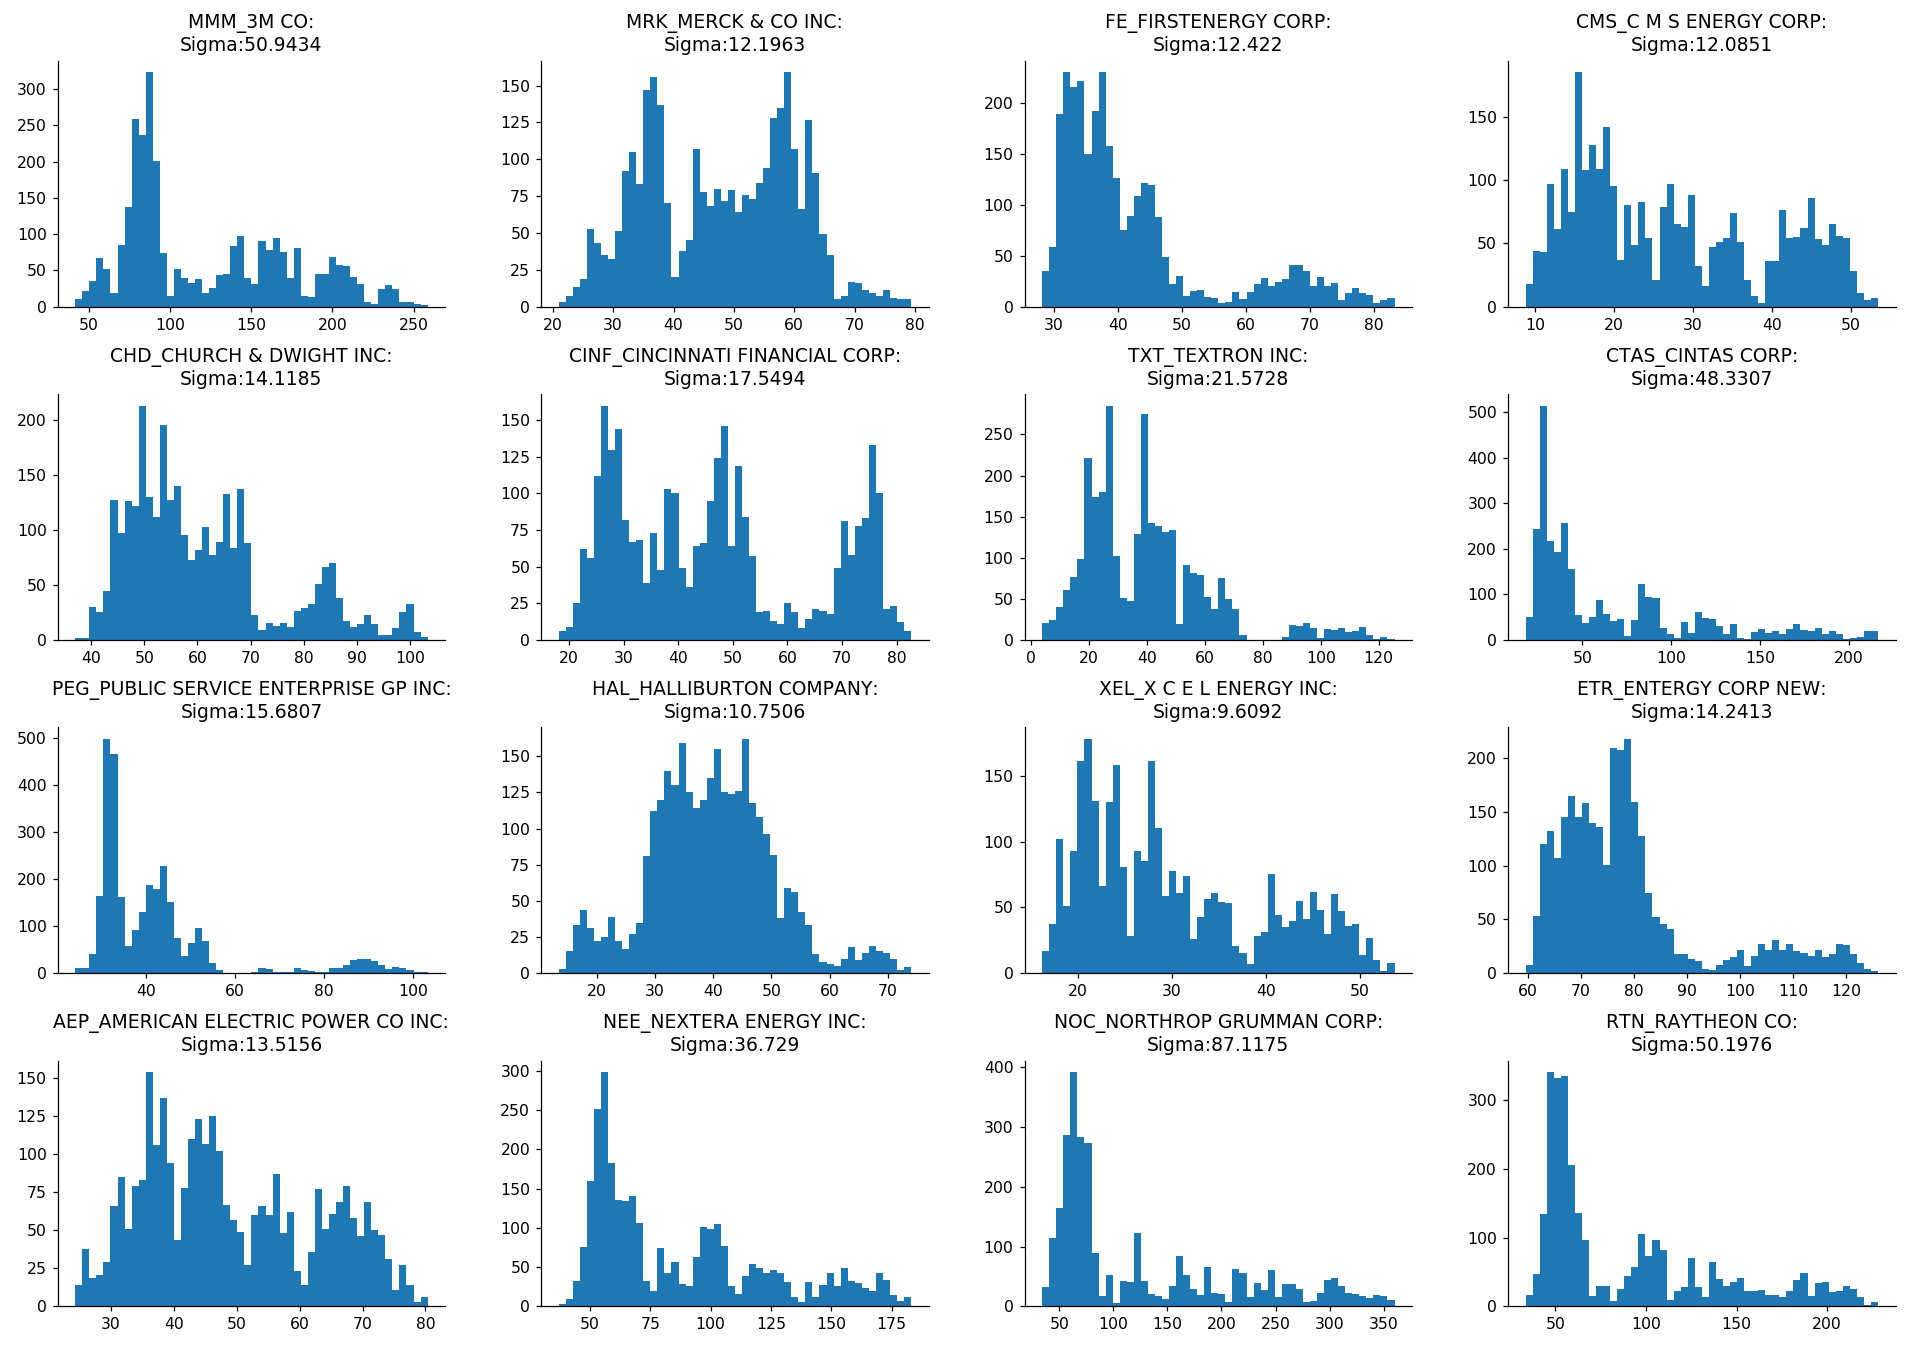









Batch 5


<IPython.core.display.Javascript object>


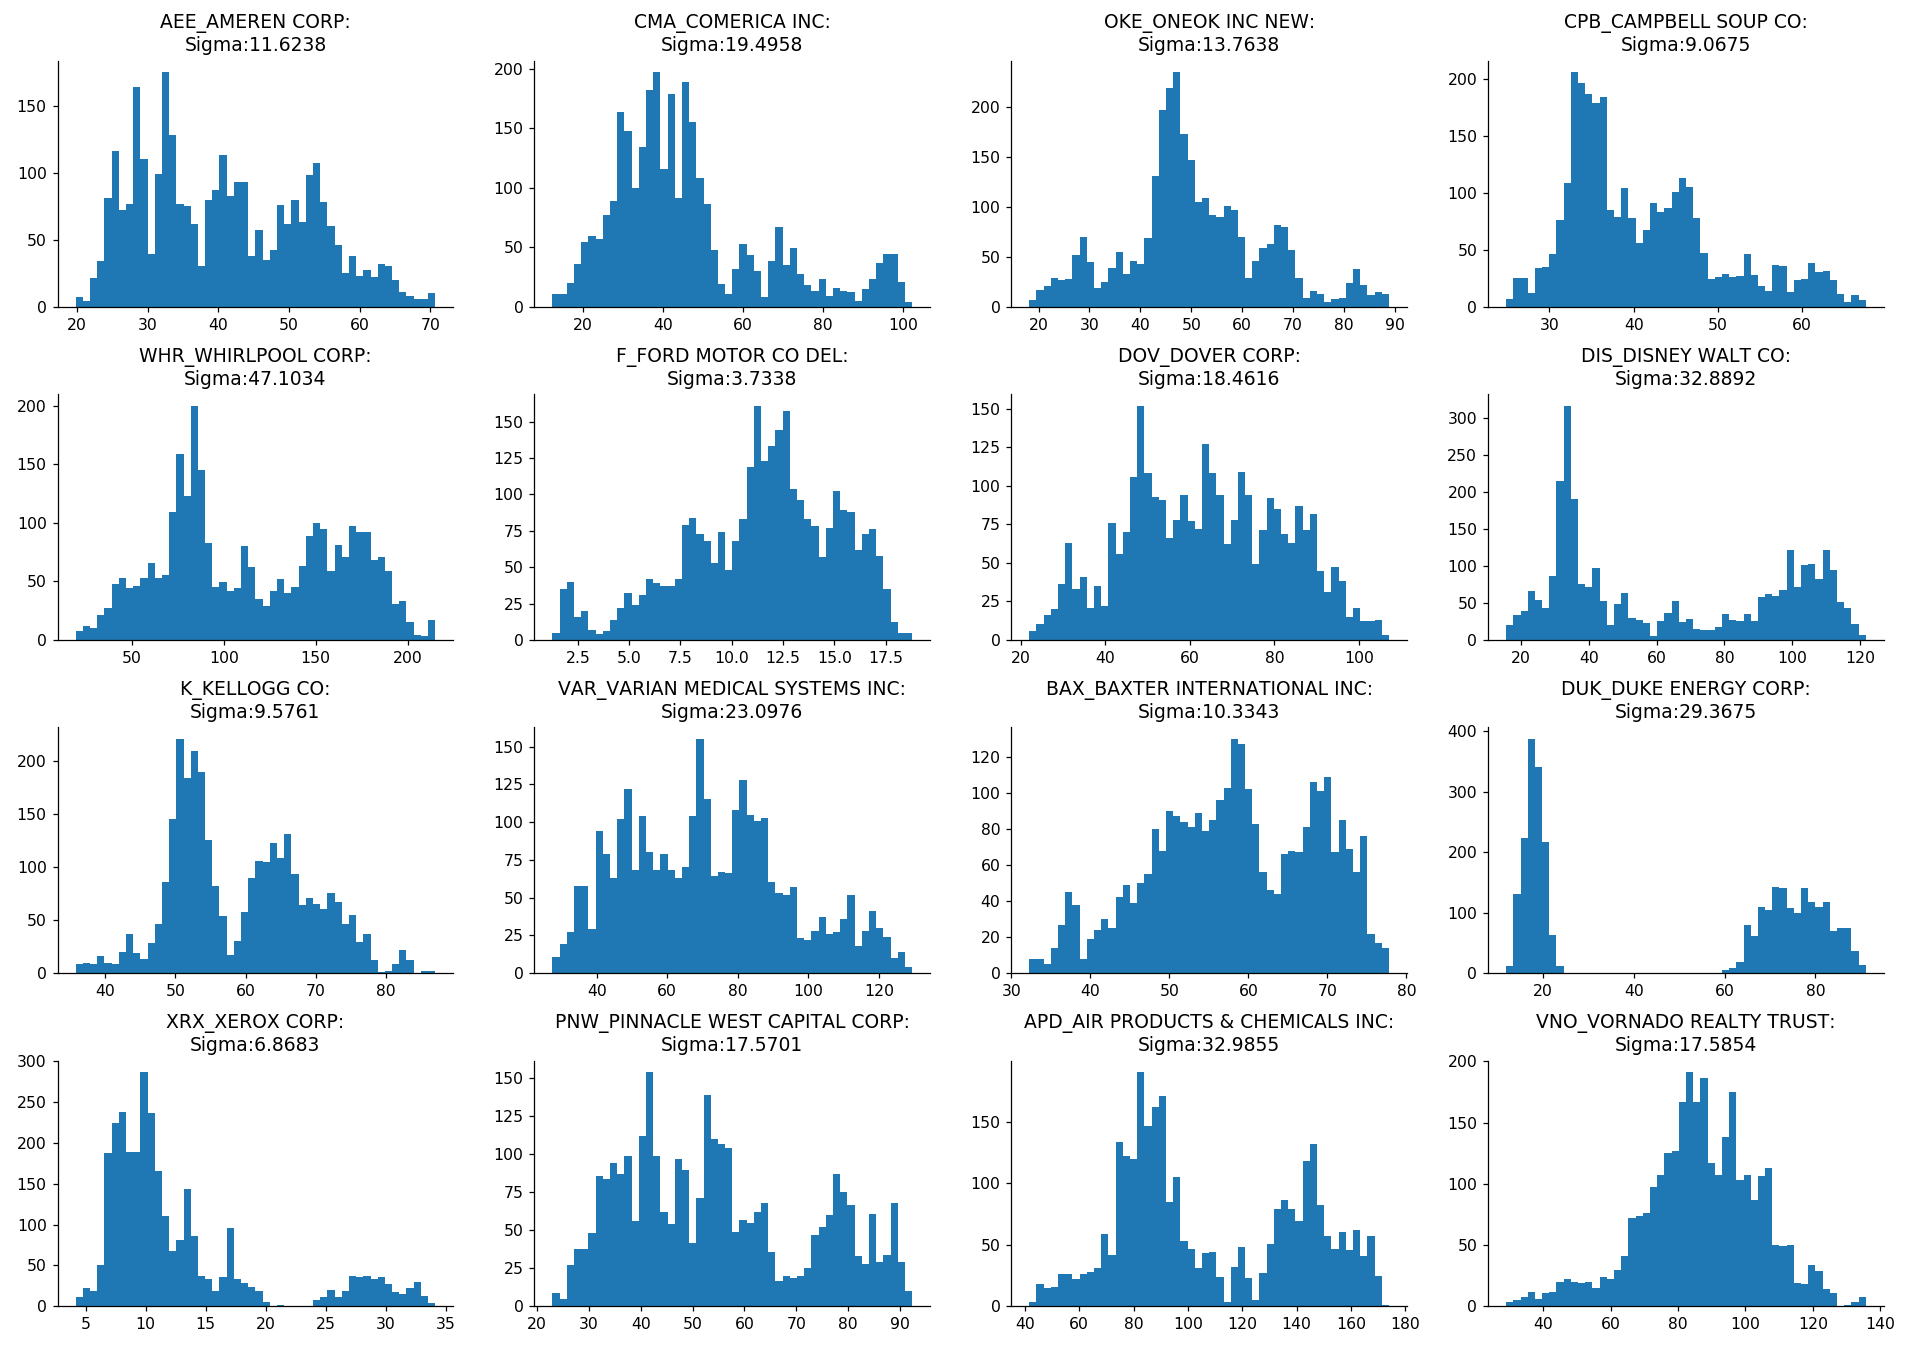









Batch 6


<IPython.core.display.Javascript object>


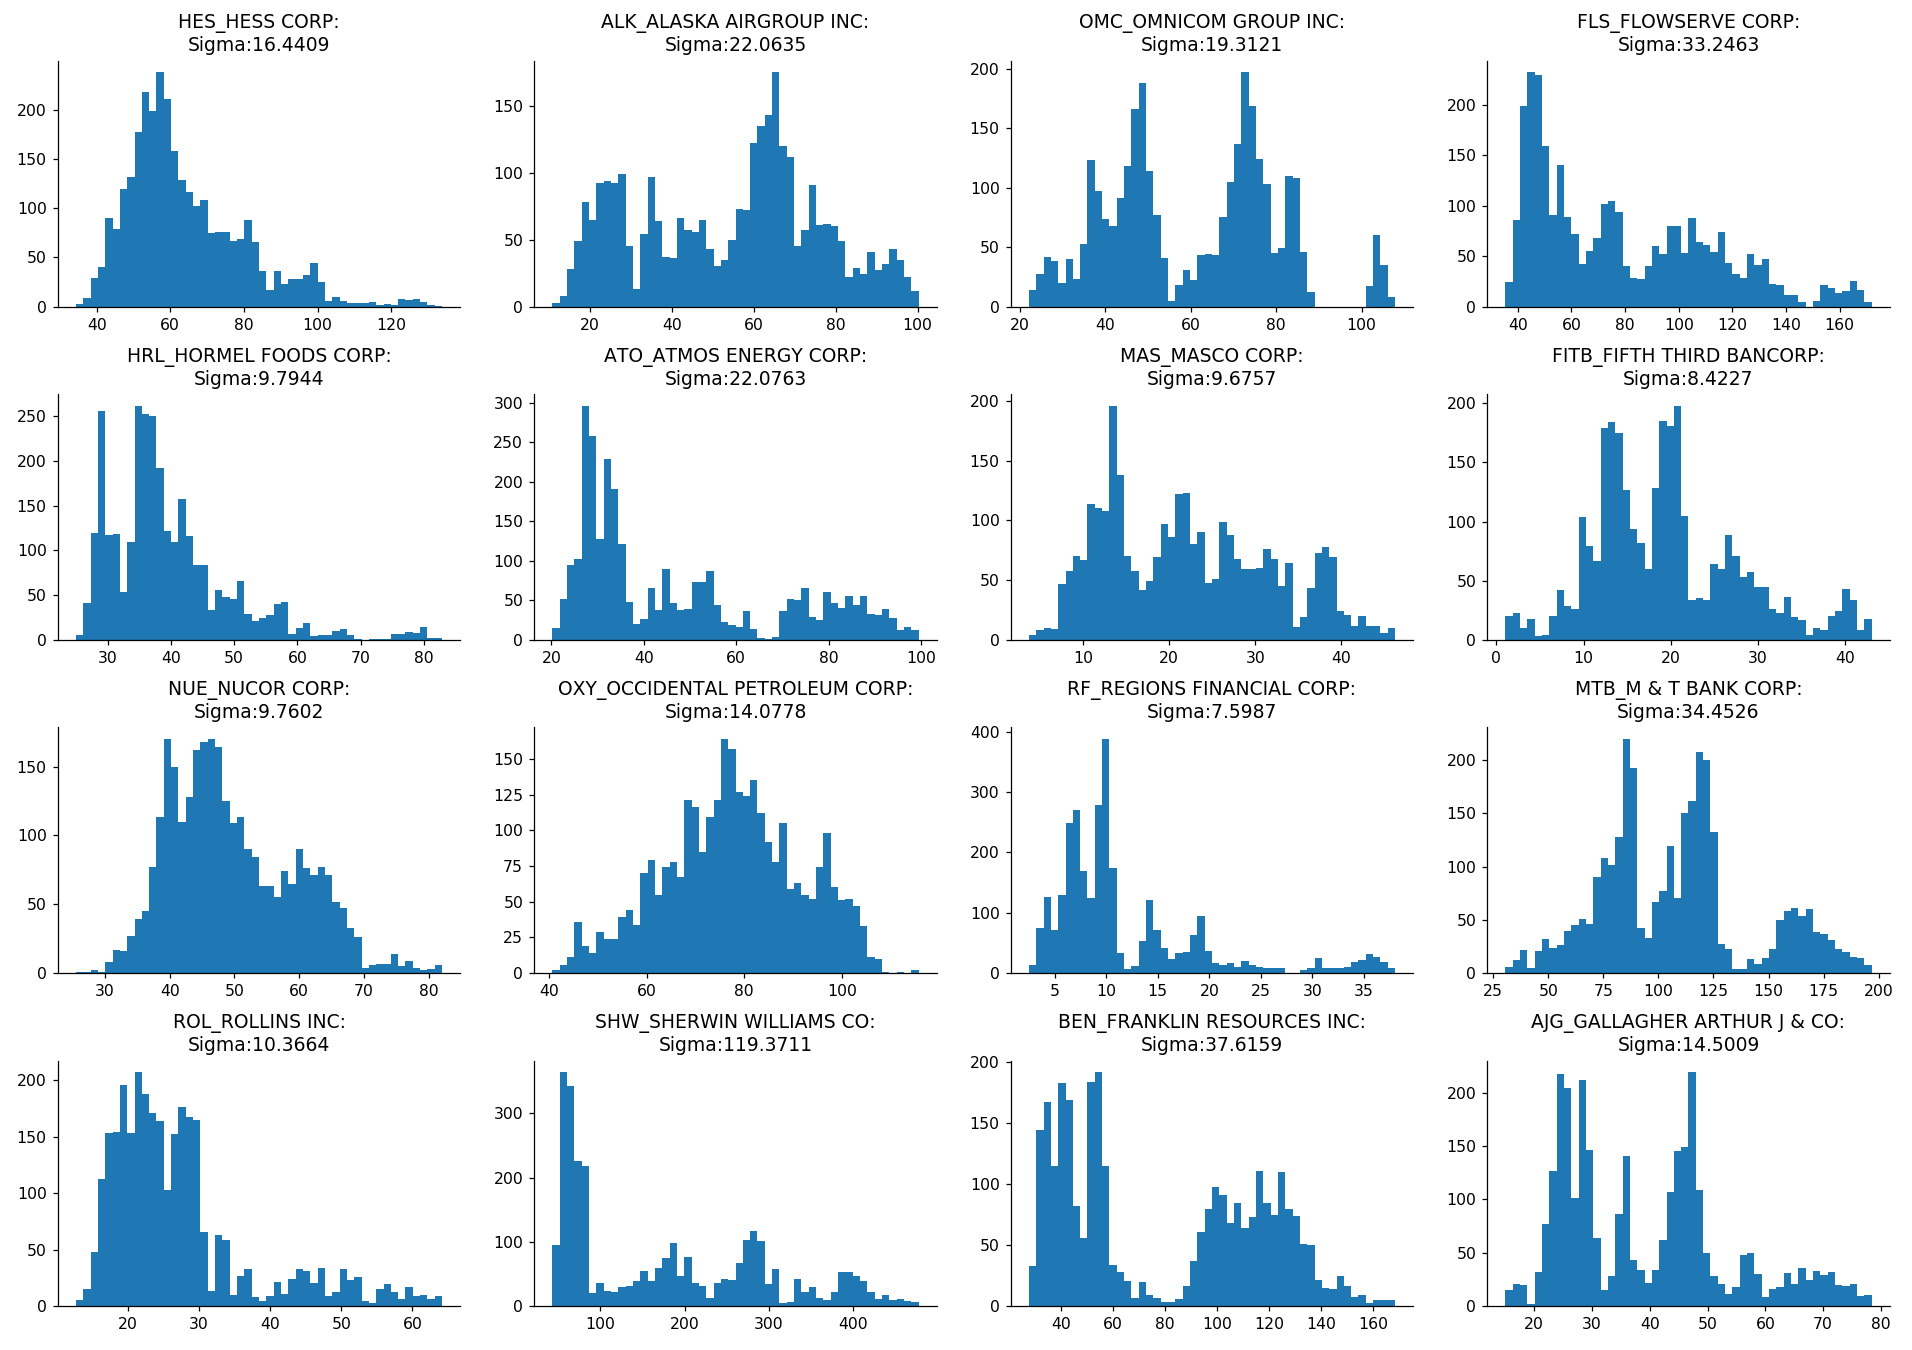









Batch 7


<IPython.core.display.Javascript object>


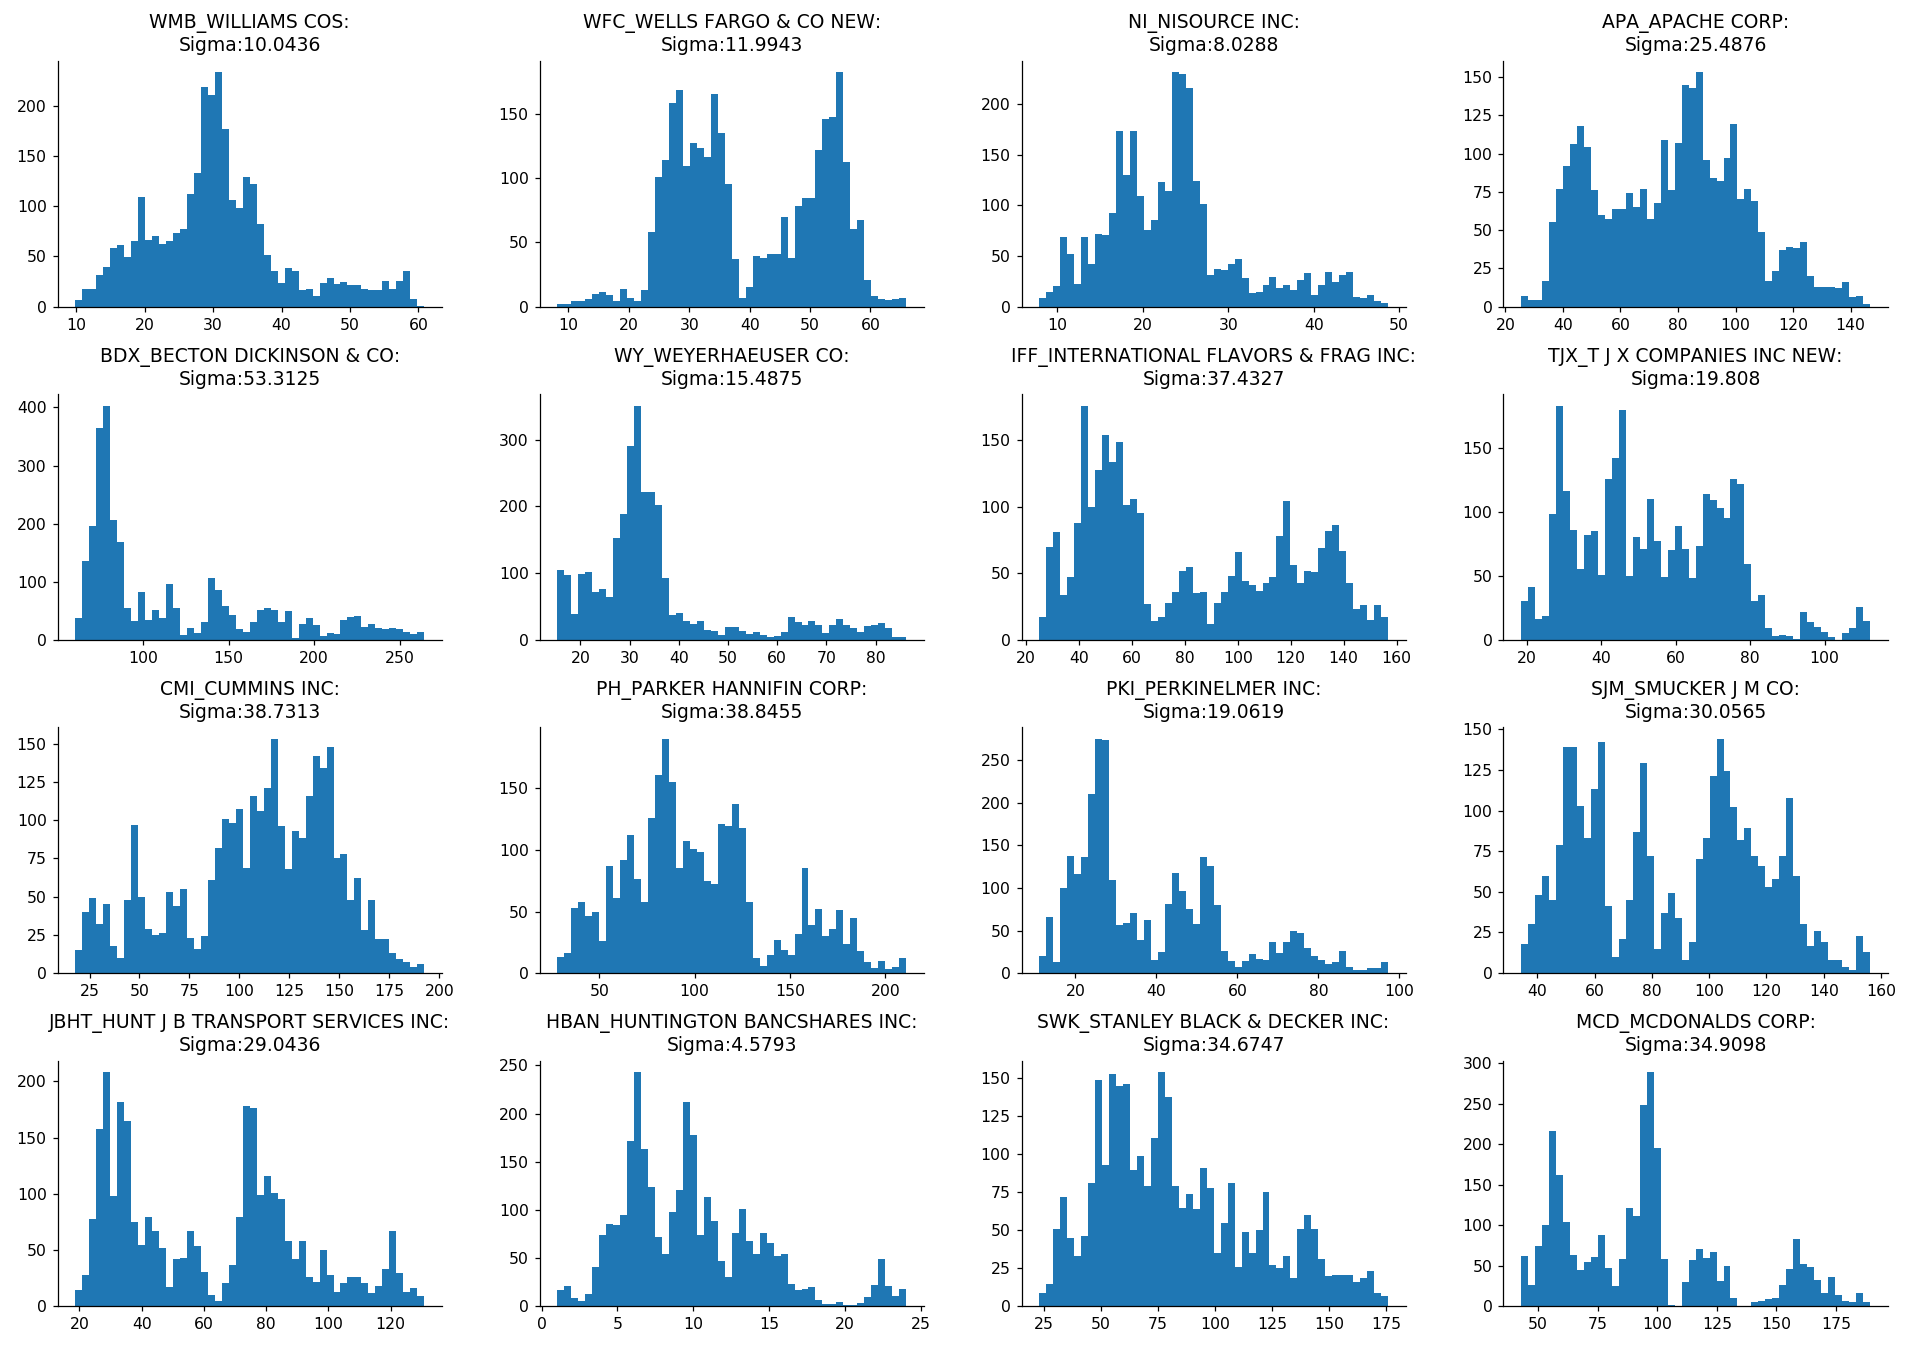









Batch 8


<IPython.core.display.Javascript object>


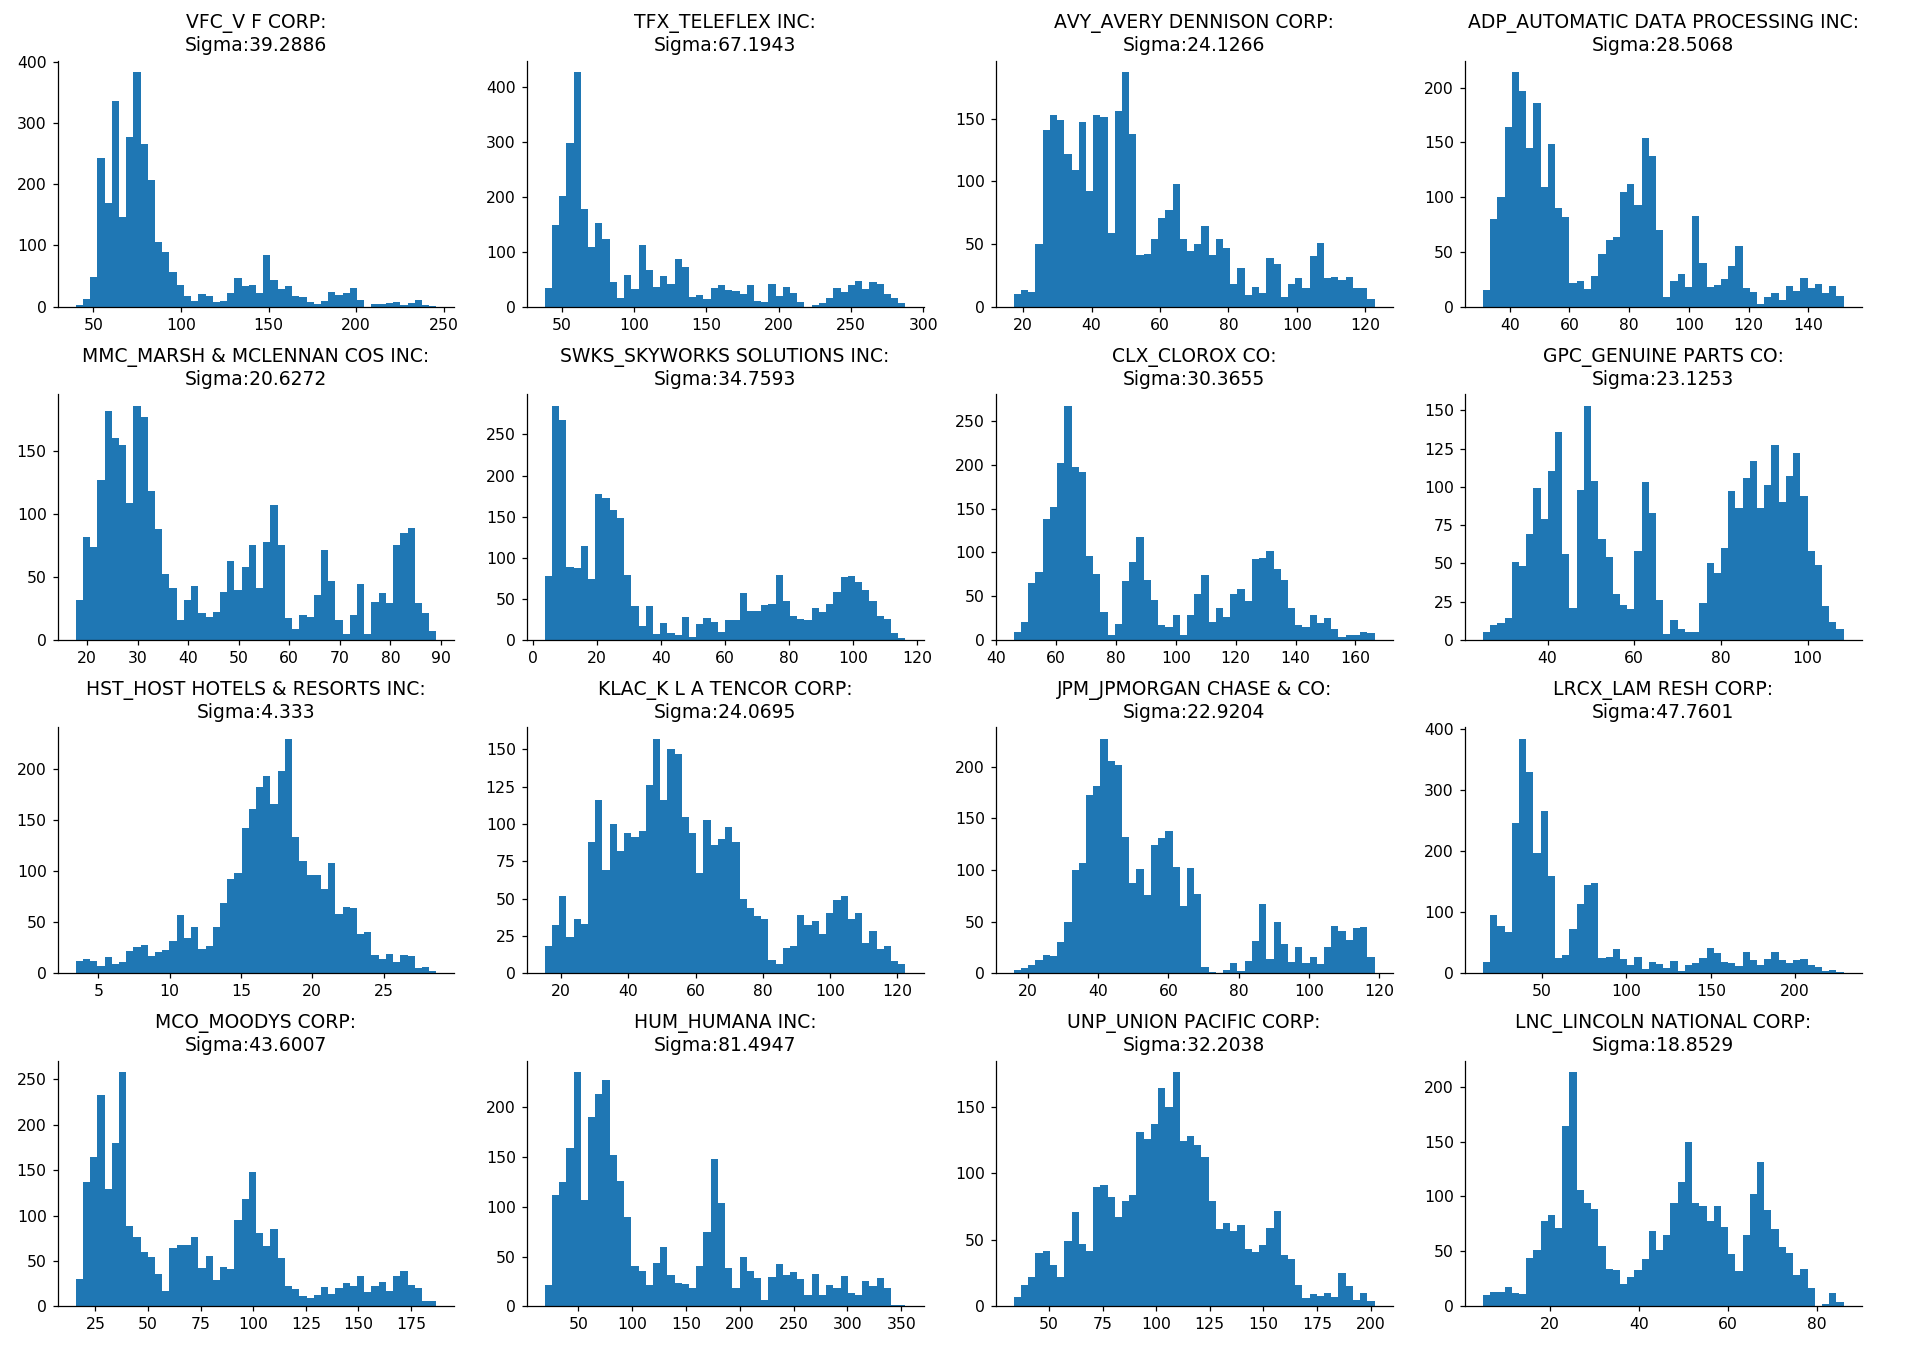









Batch 9


<IPython.core.display.Javascript object>


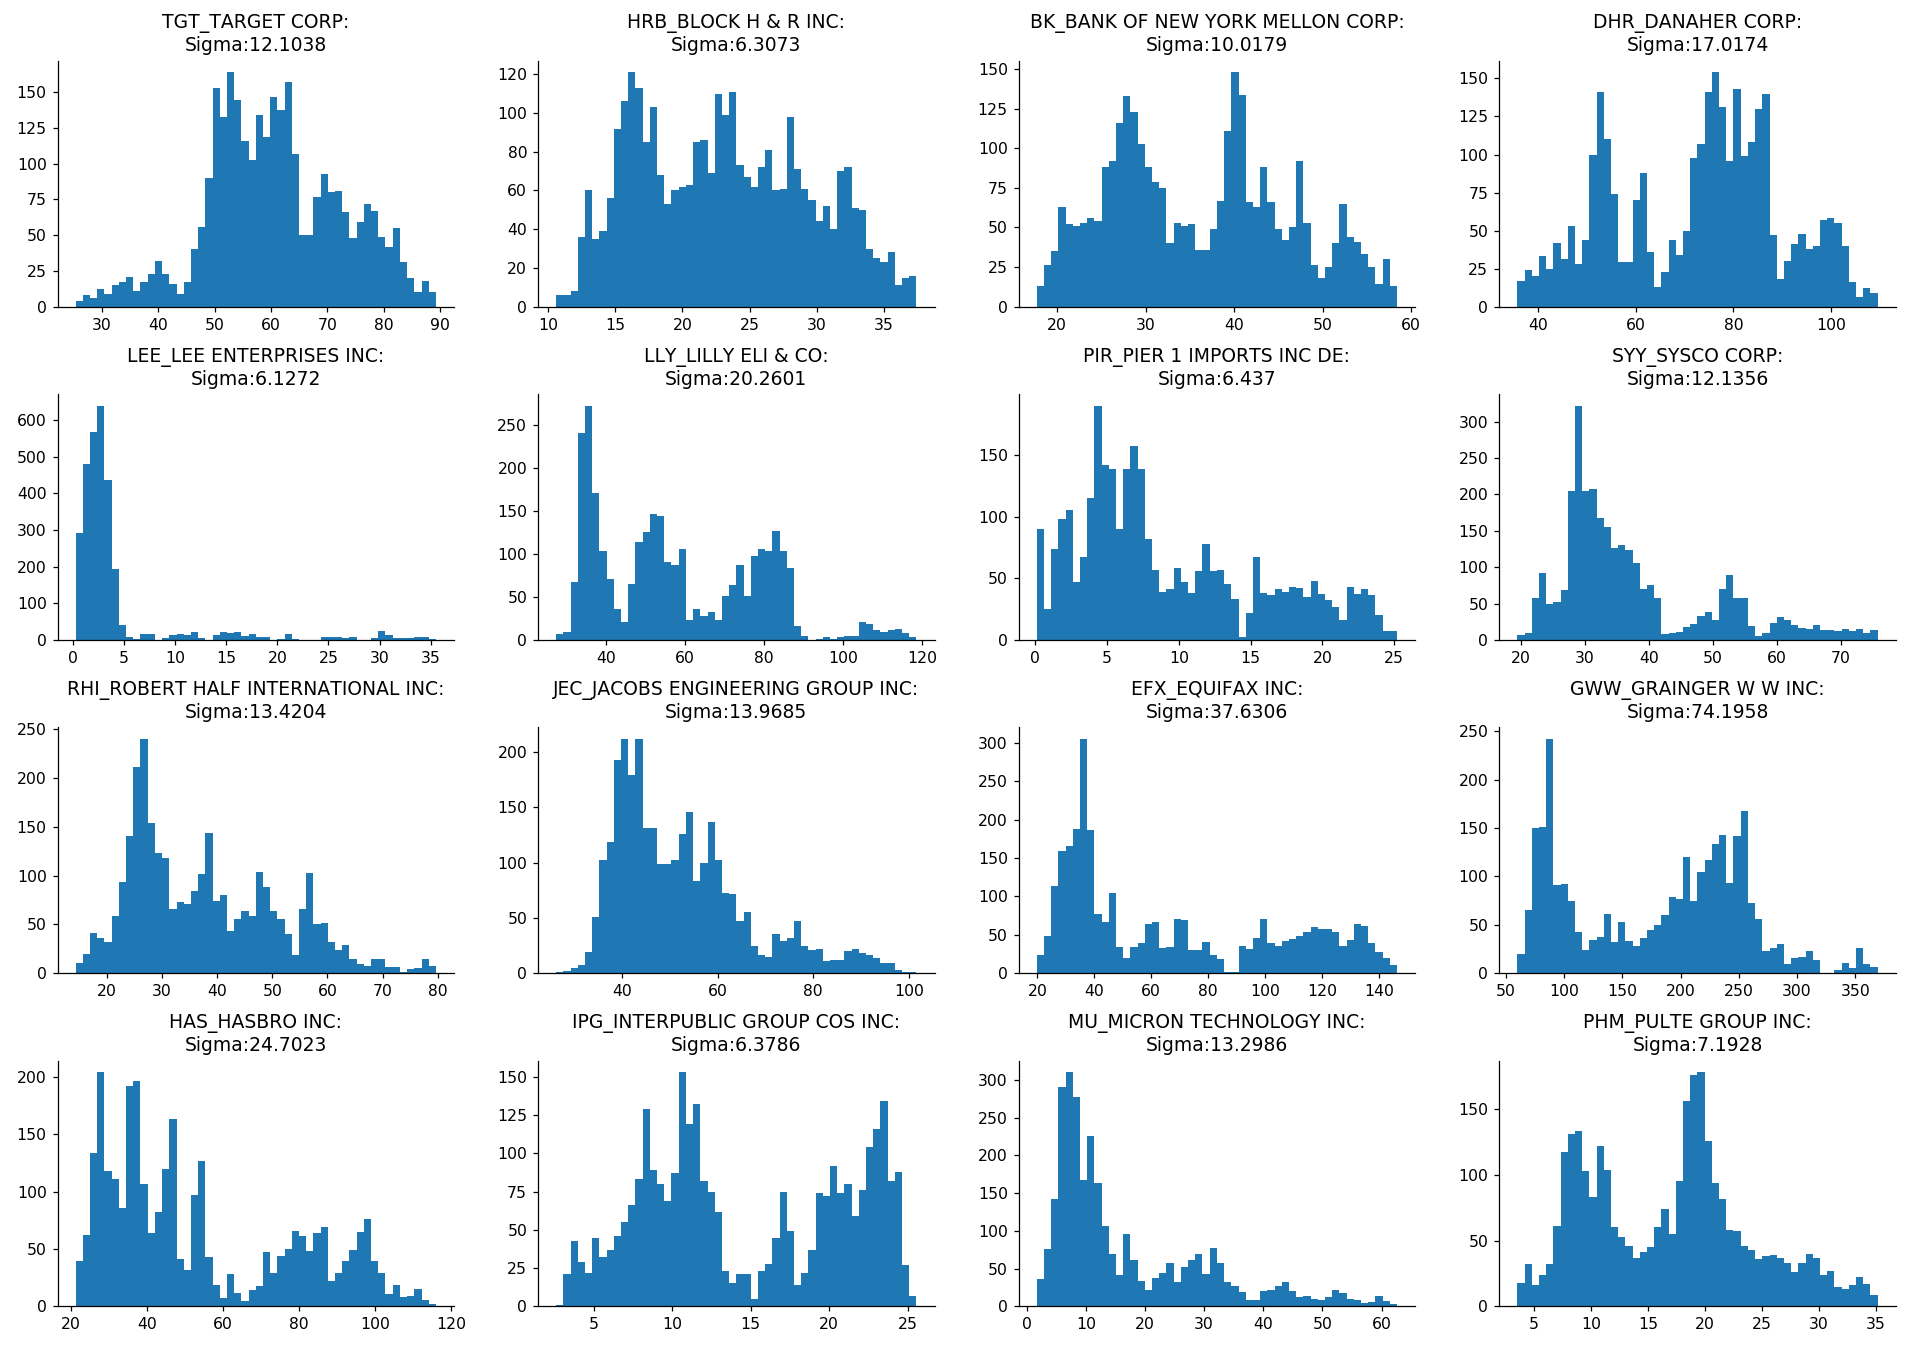









Batch 10


<IPython.core.display.Javascript object>


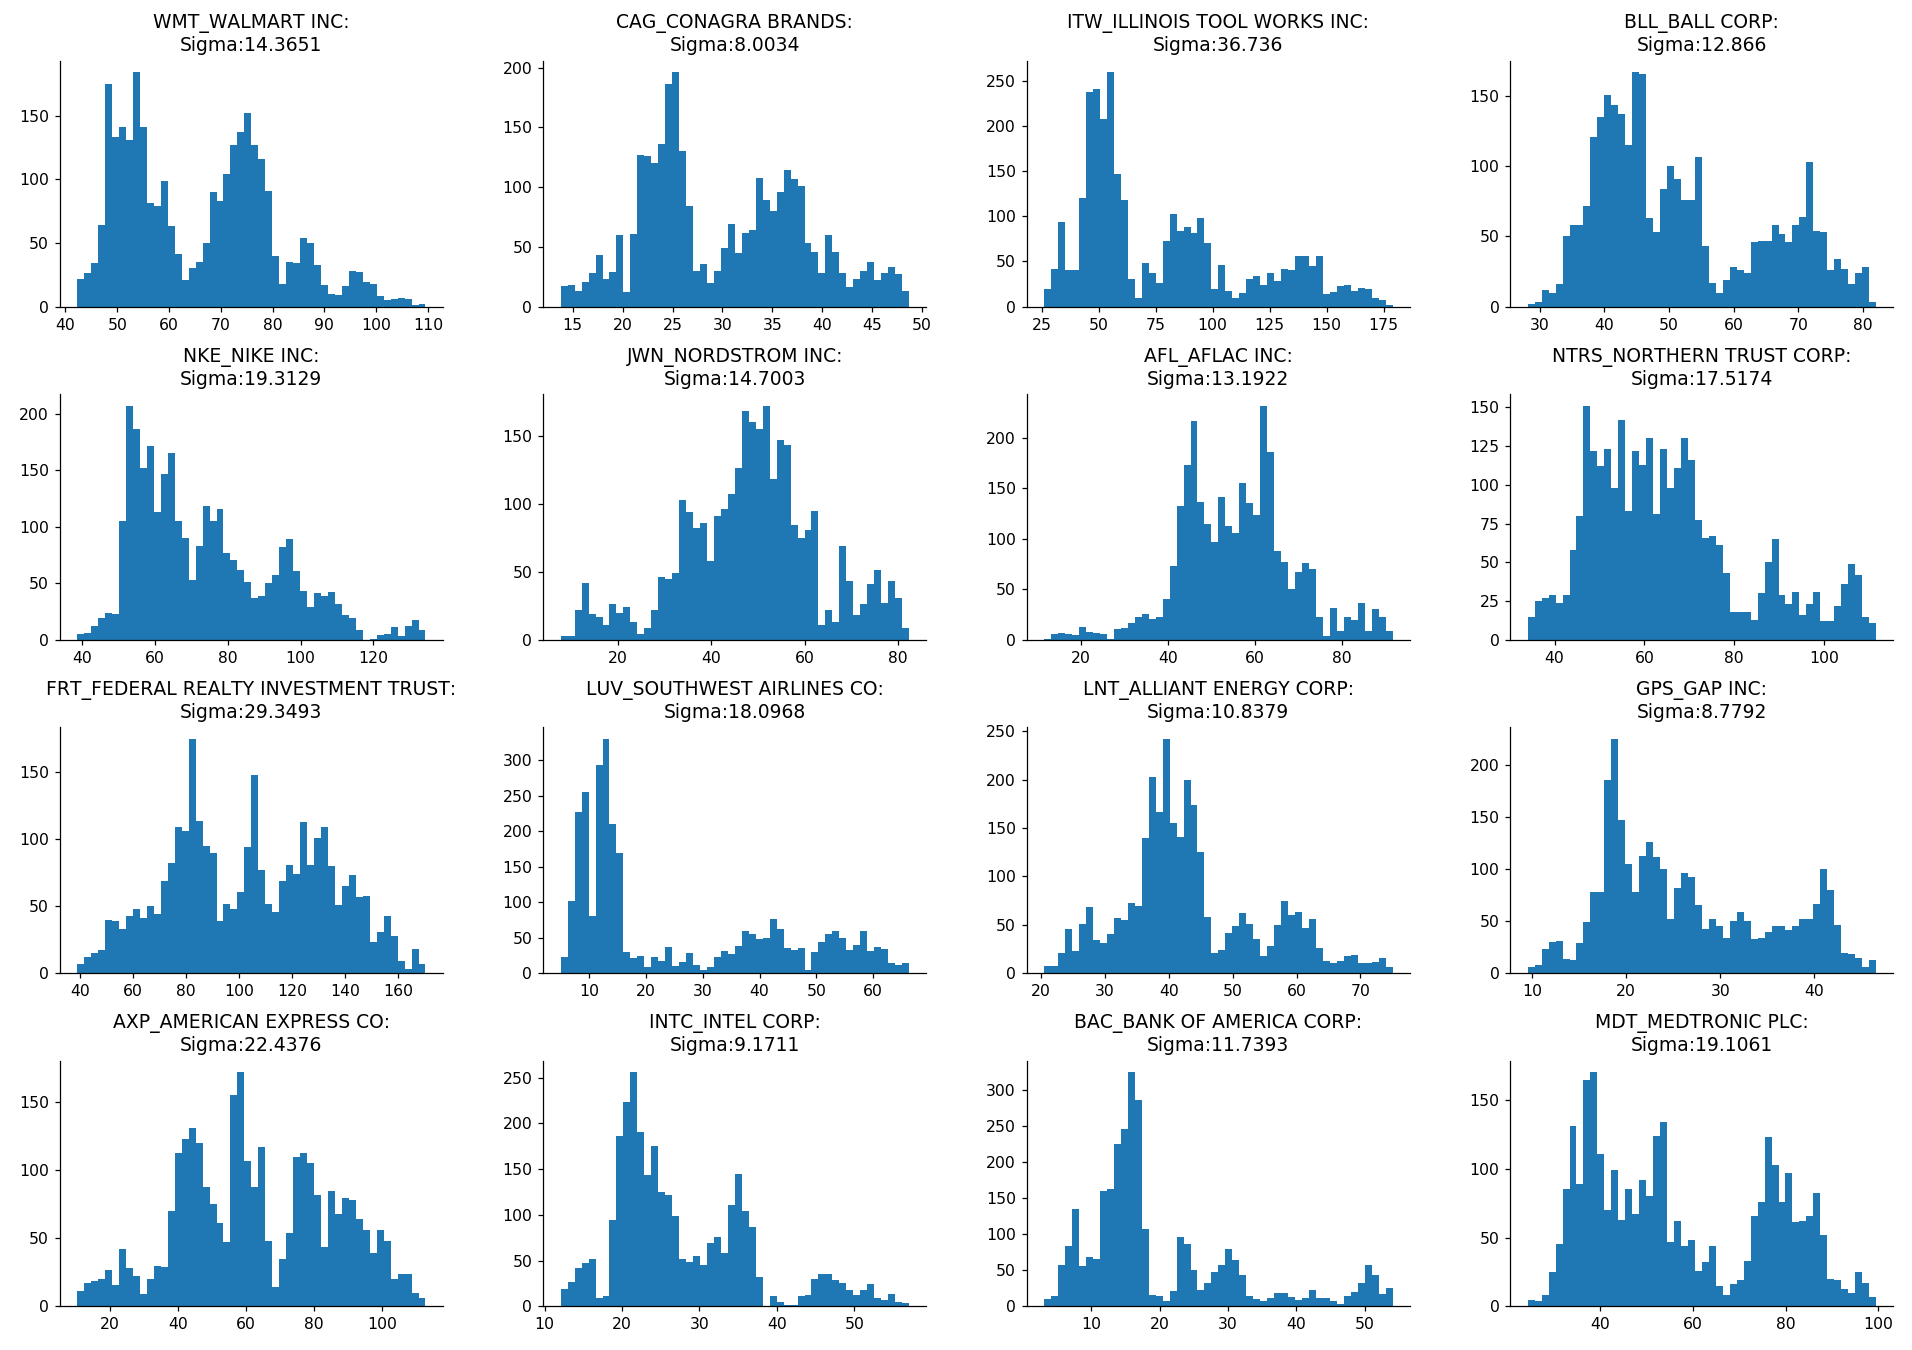









Batch 11


<IPython.core.display.Javascript object>


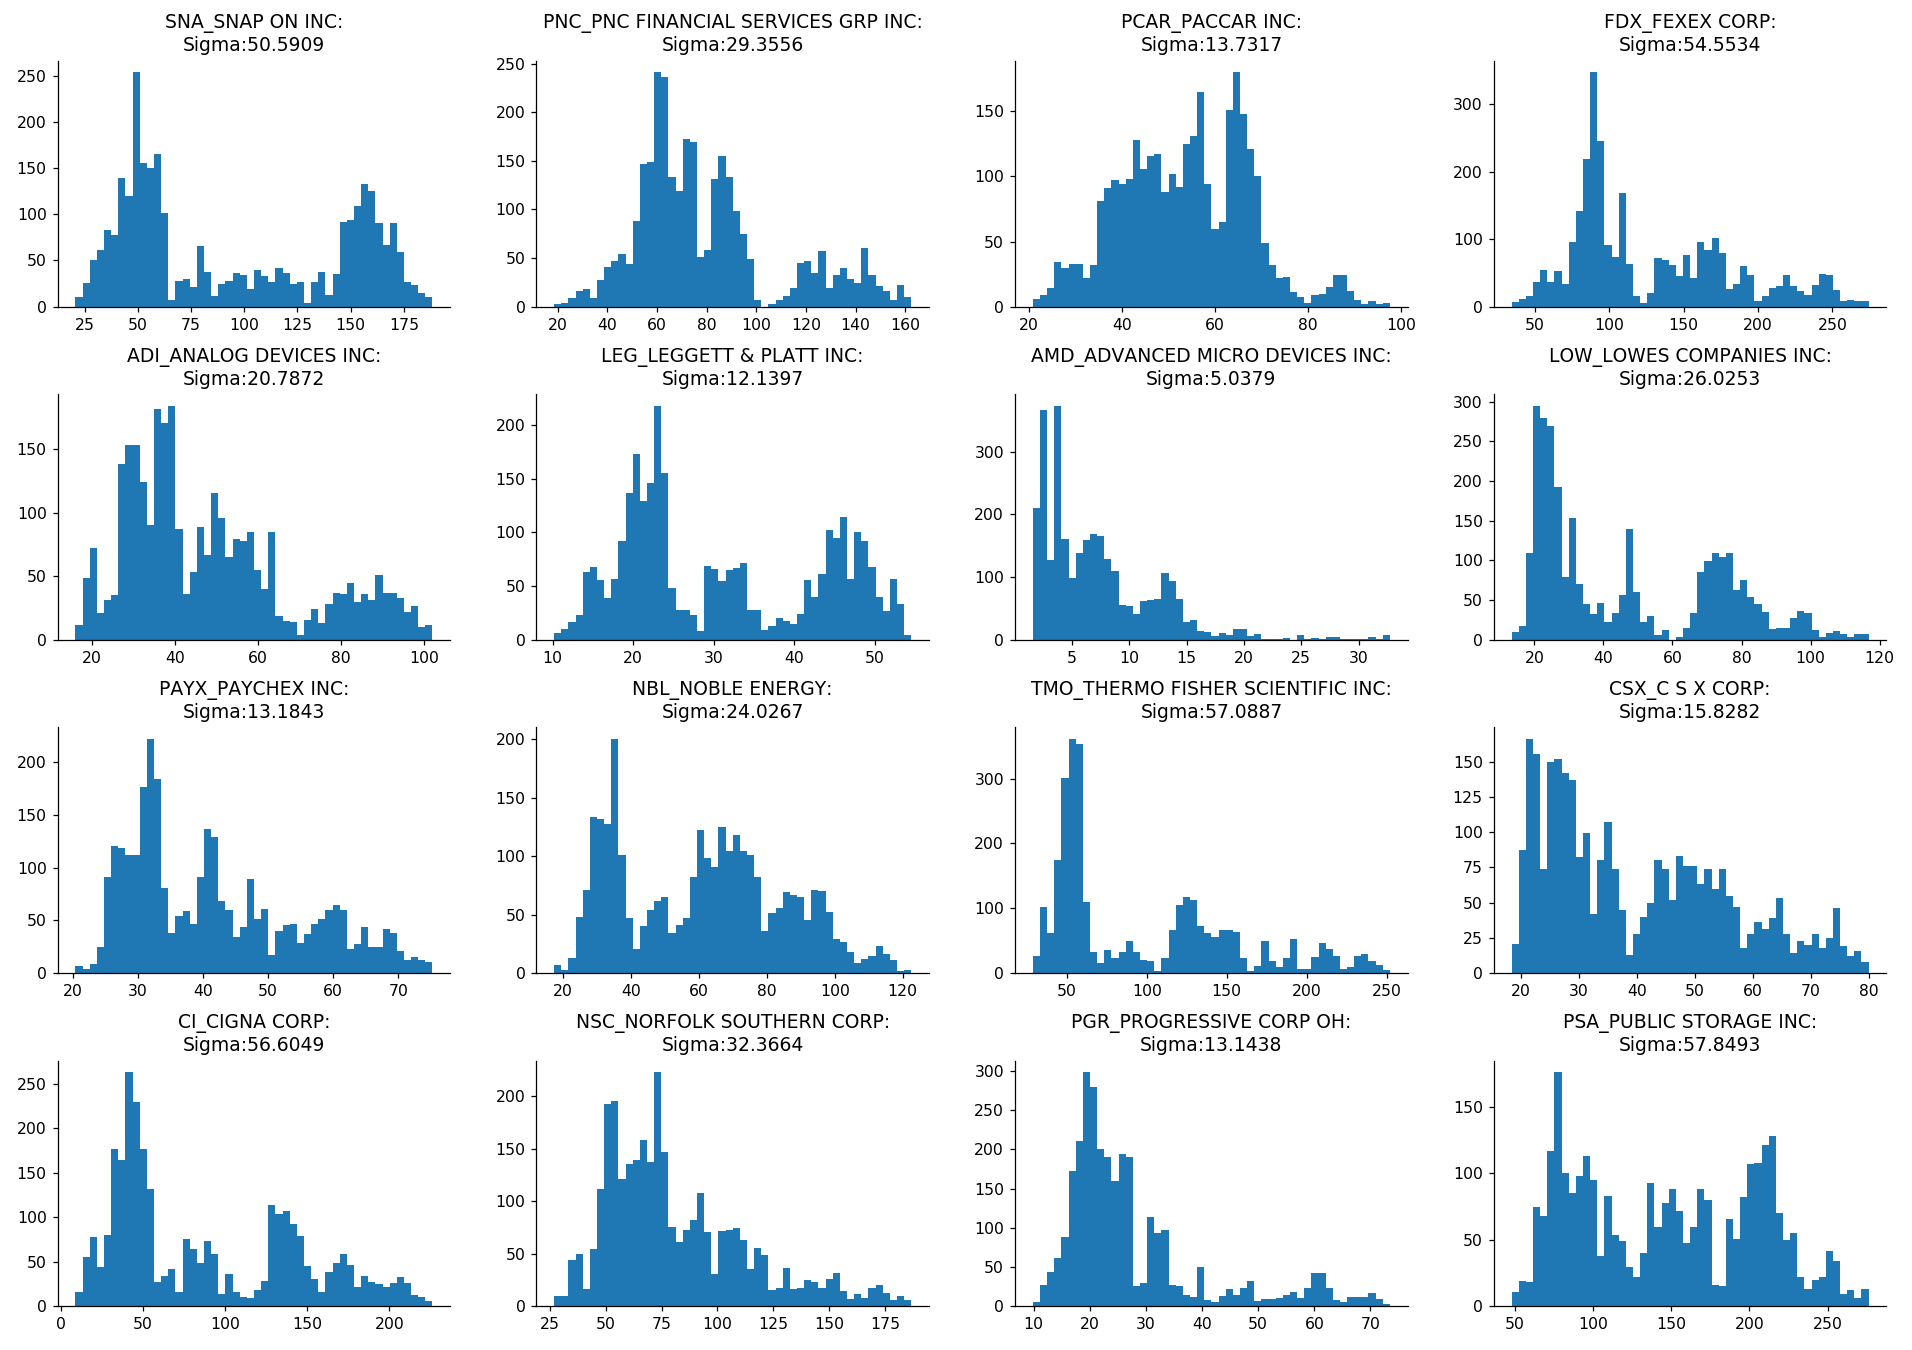









Batch 12


<IPython.core.display.Javascript object>


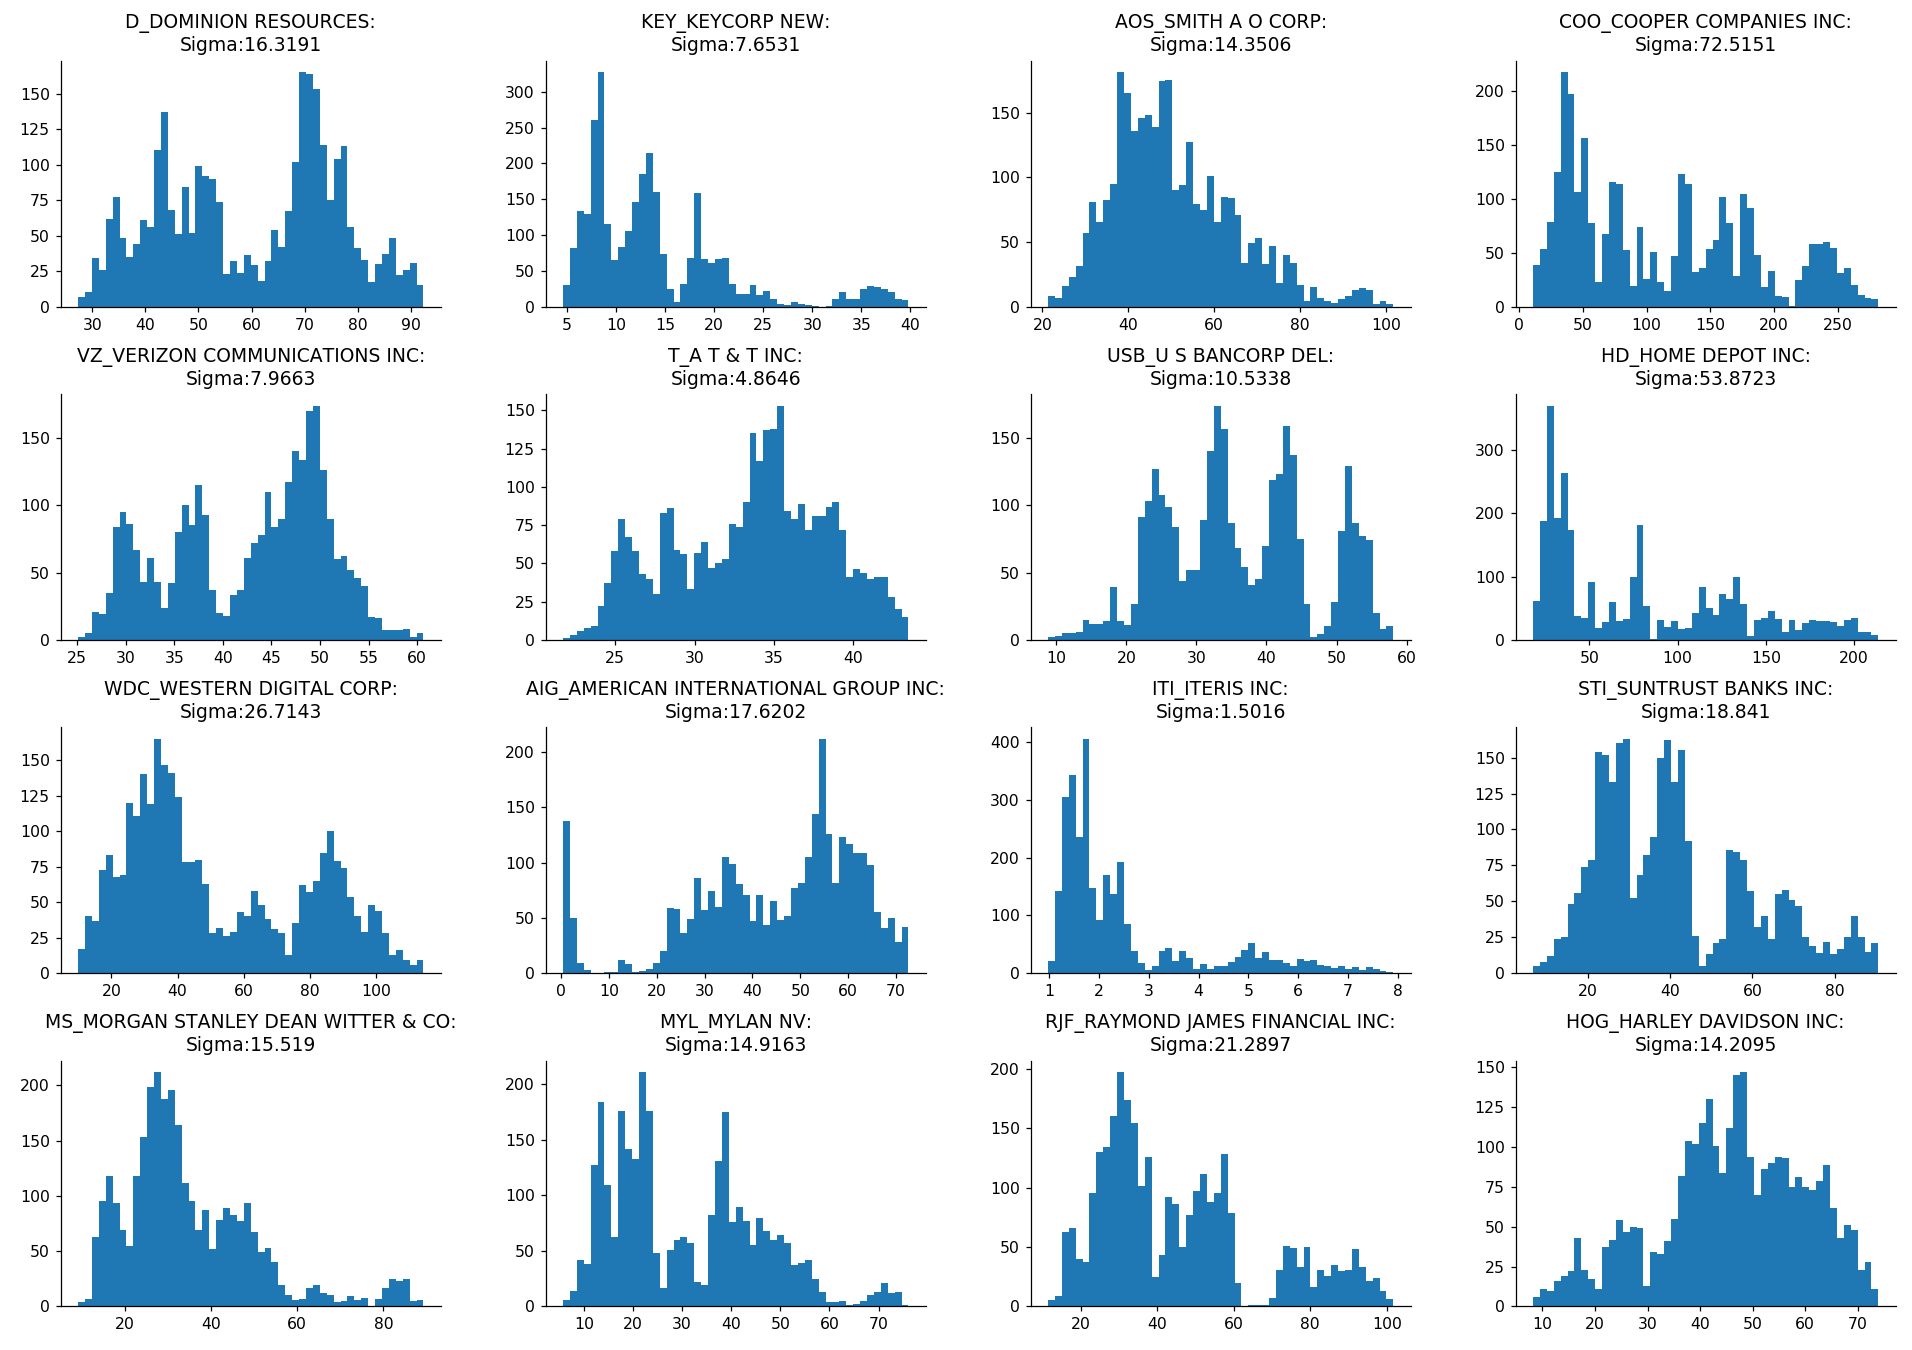









Batch 13


<IPython.core.display.Javascript object>


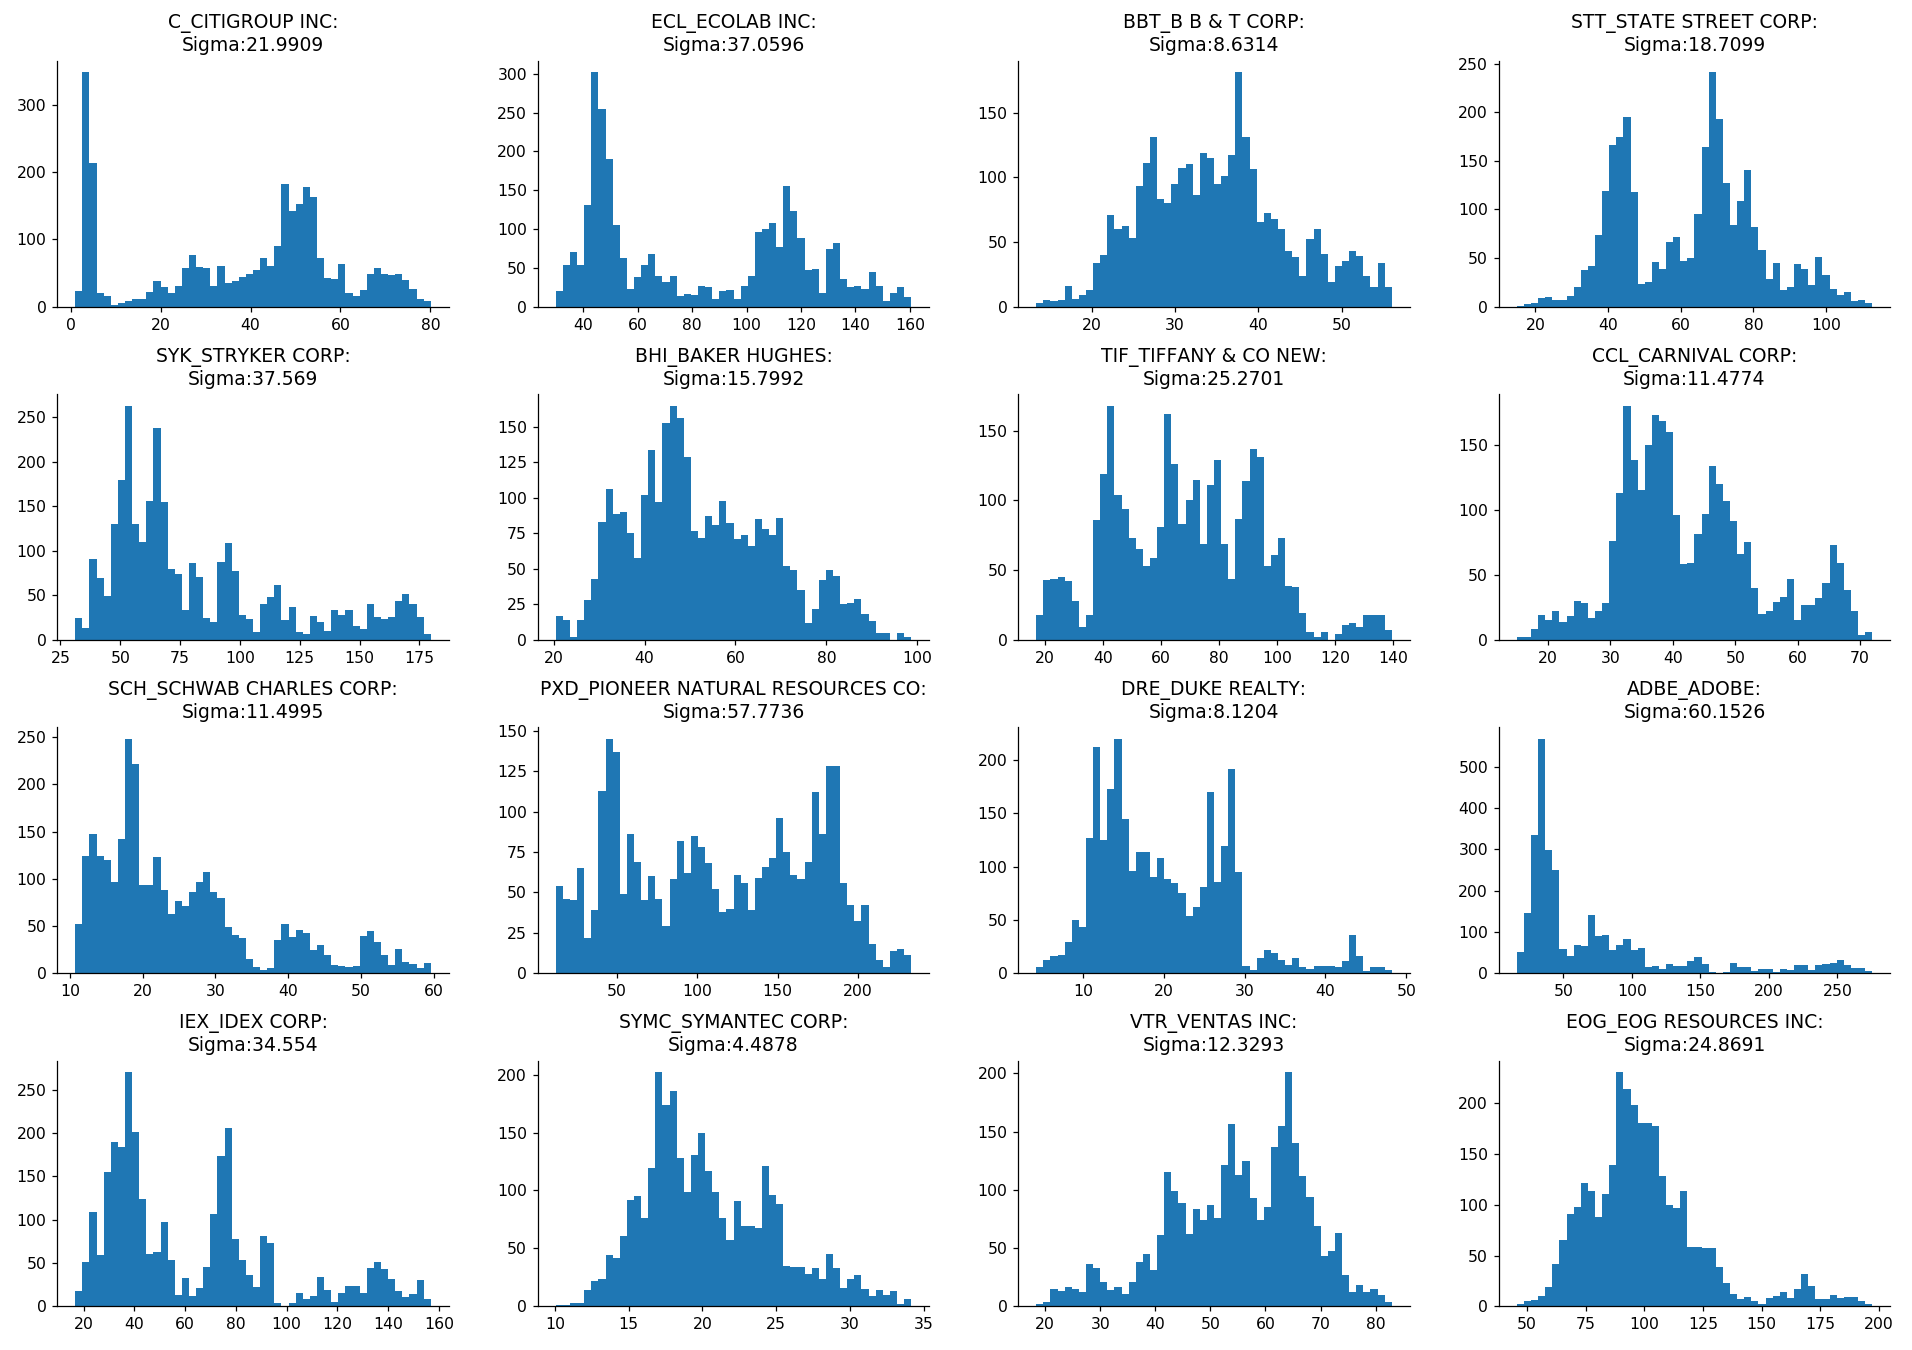









Batch 14


<IPython.core.display.Javascript object>


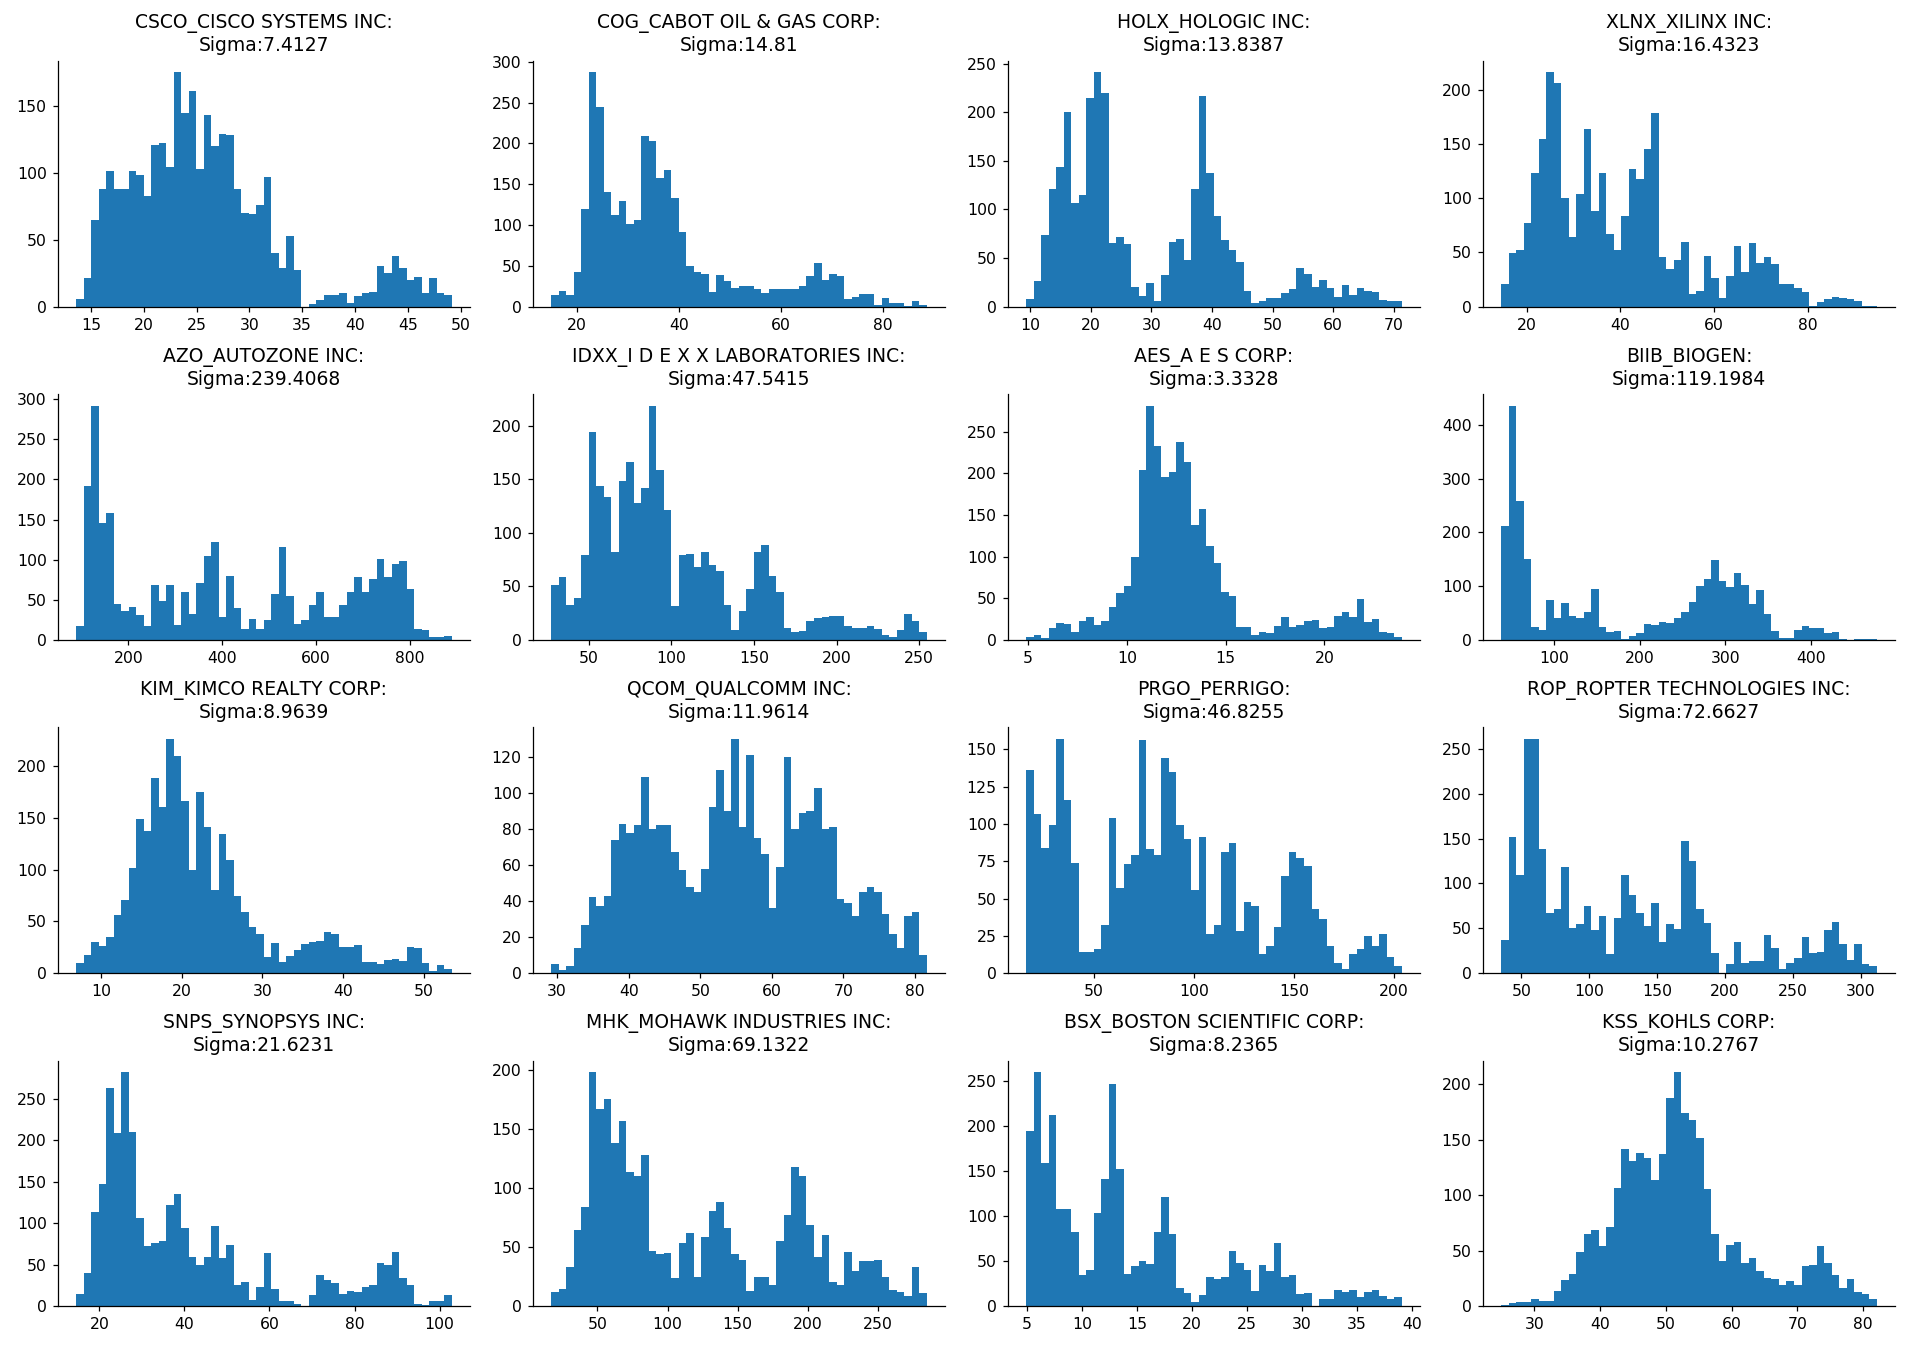









Batch 15


<IPython.core.display.Javascript object>


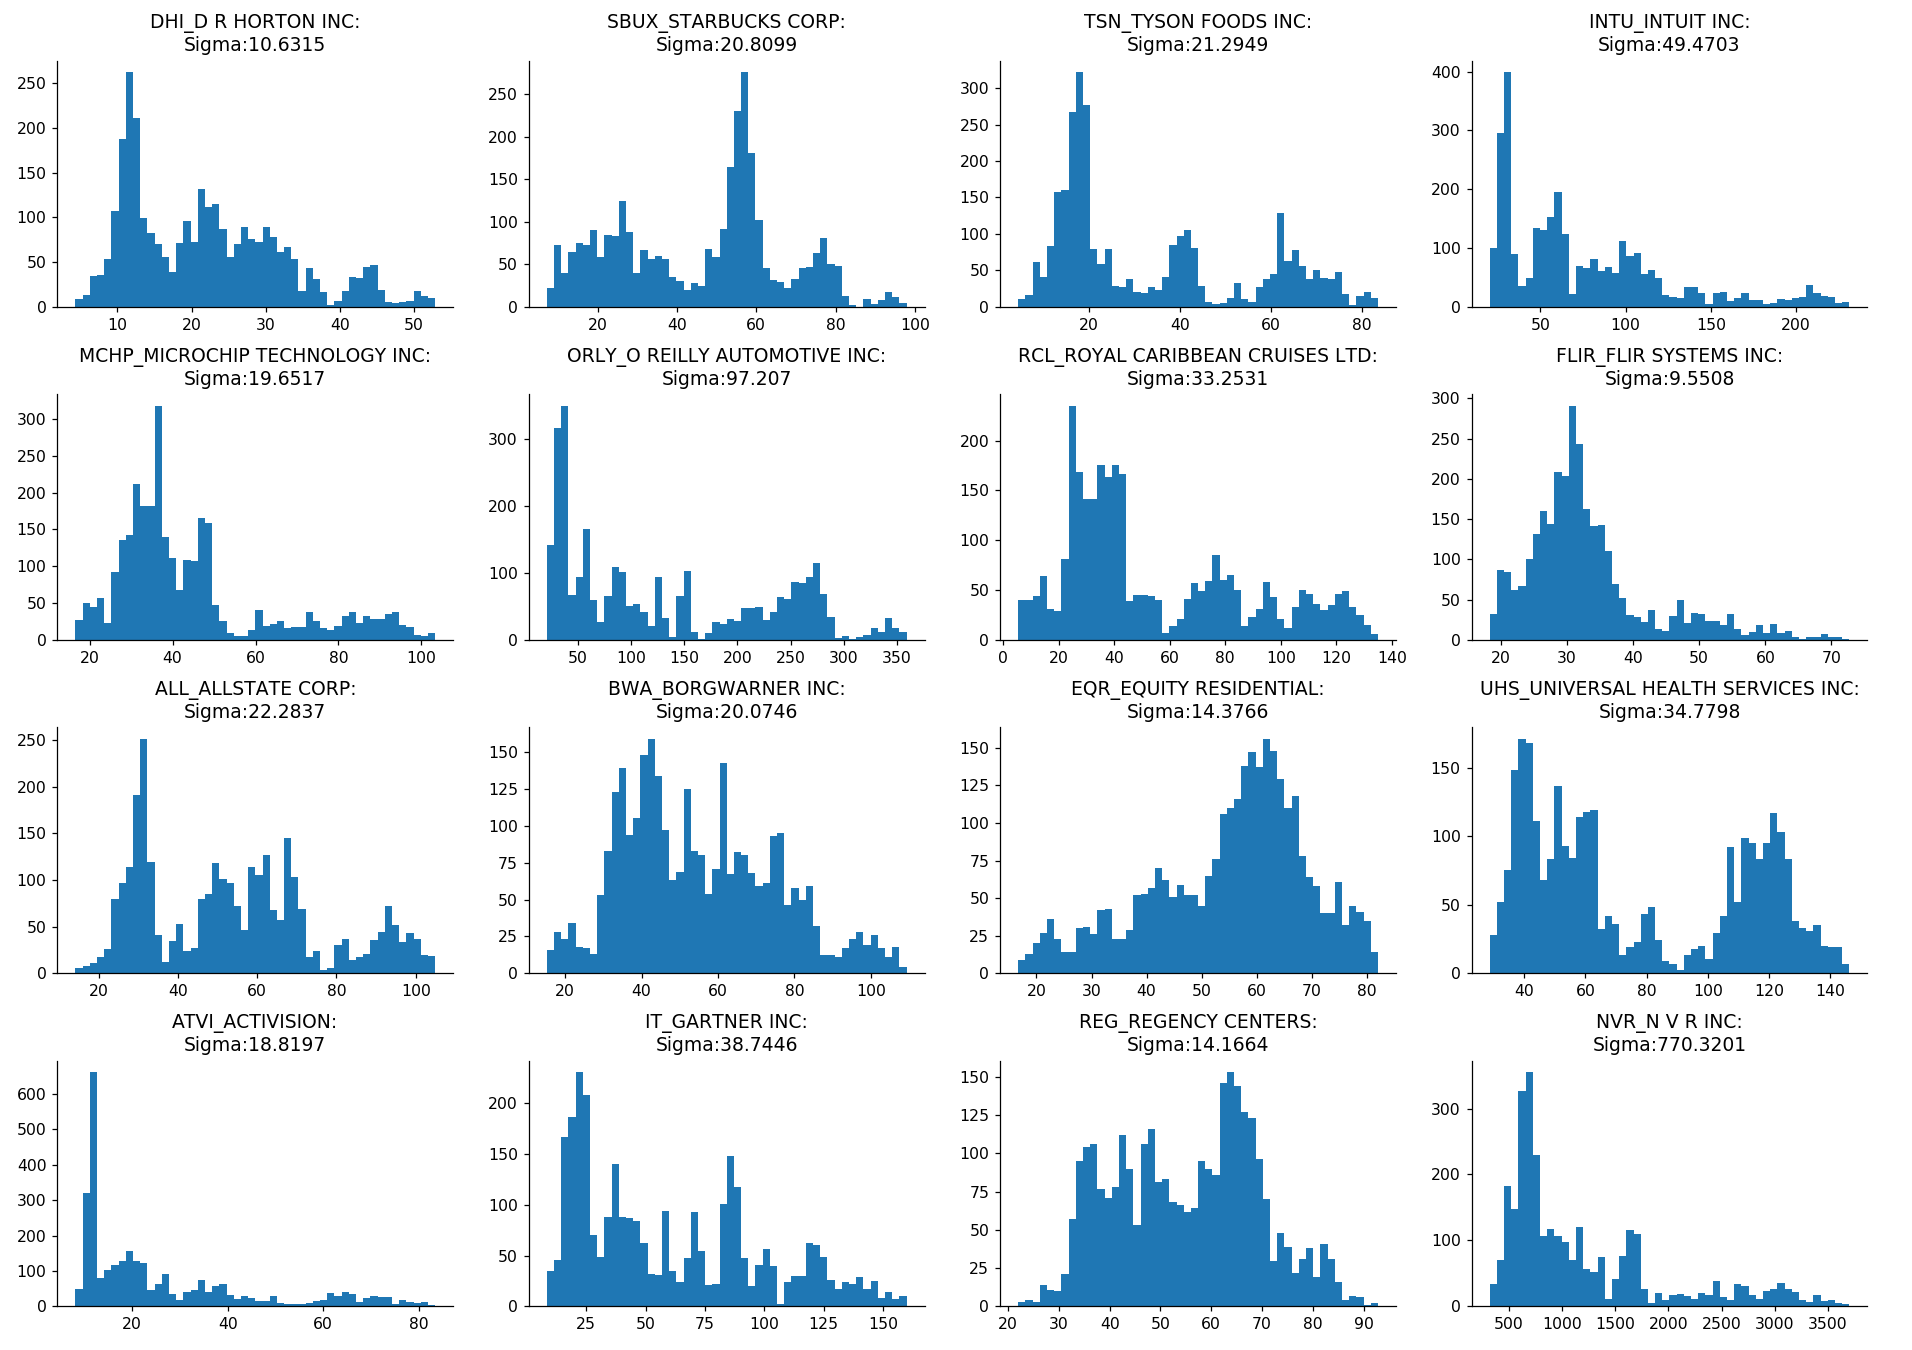









Batch 16


<IPython.core.display.Javascript object>


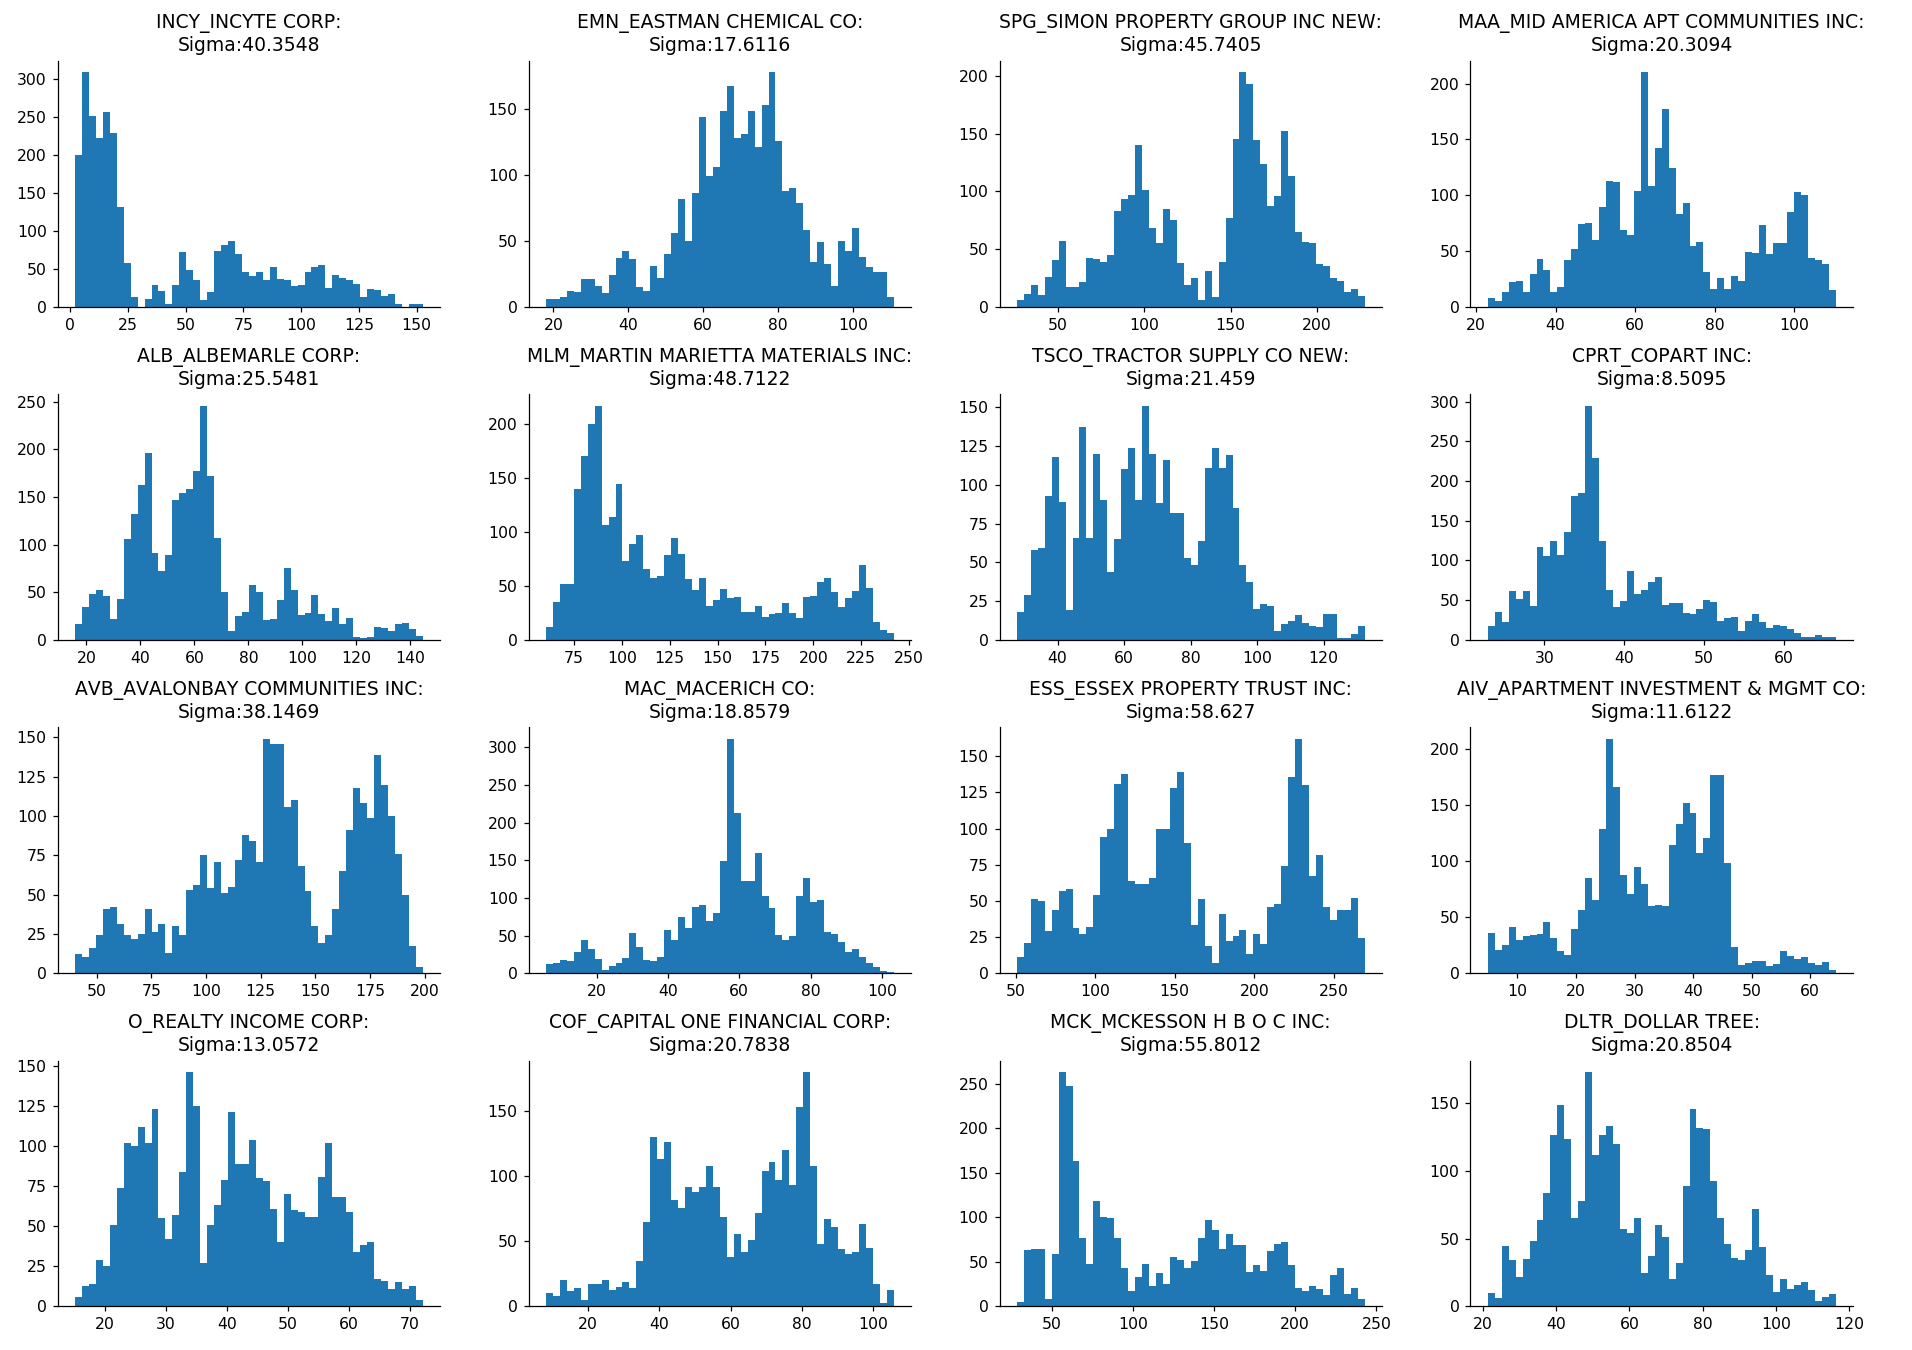









Batch 17


<IPython.core.display.Javascript object>


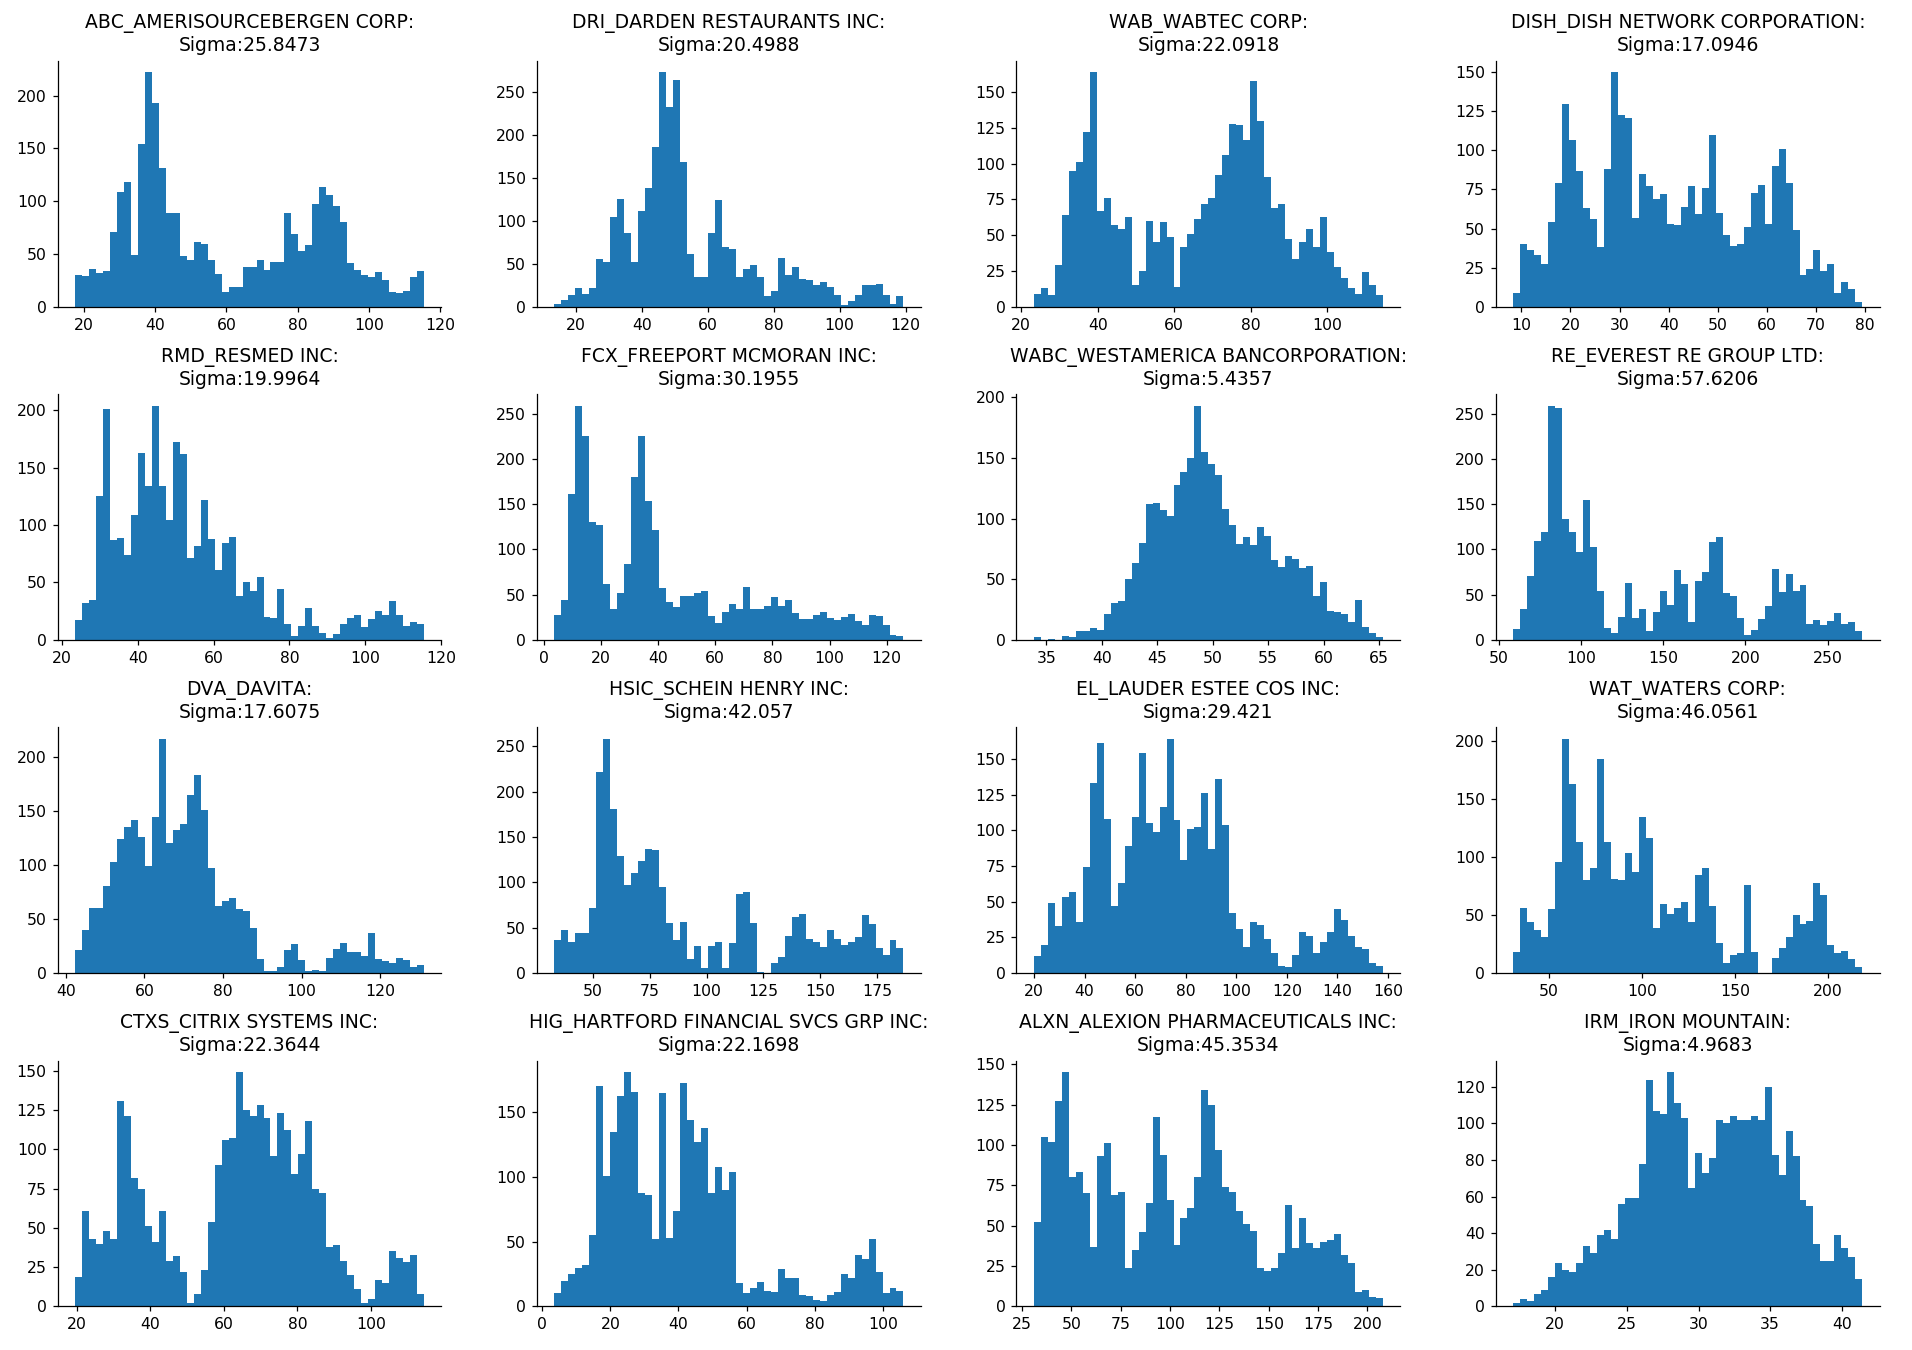









Batch 18


<IPython.core.display.Javascript object>


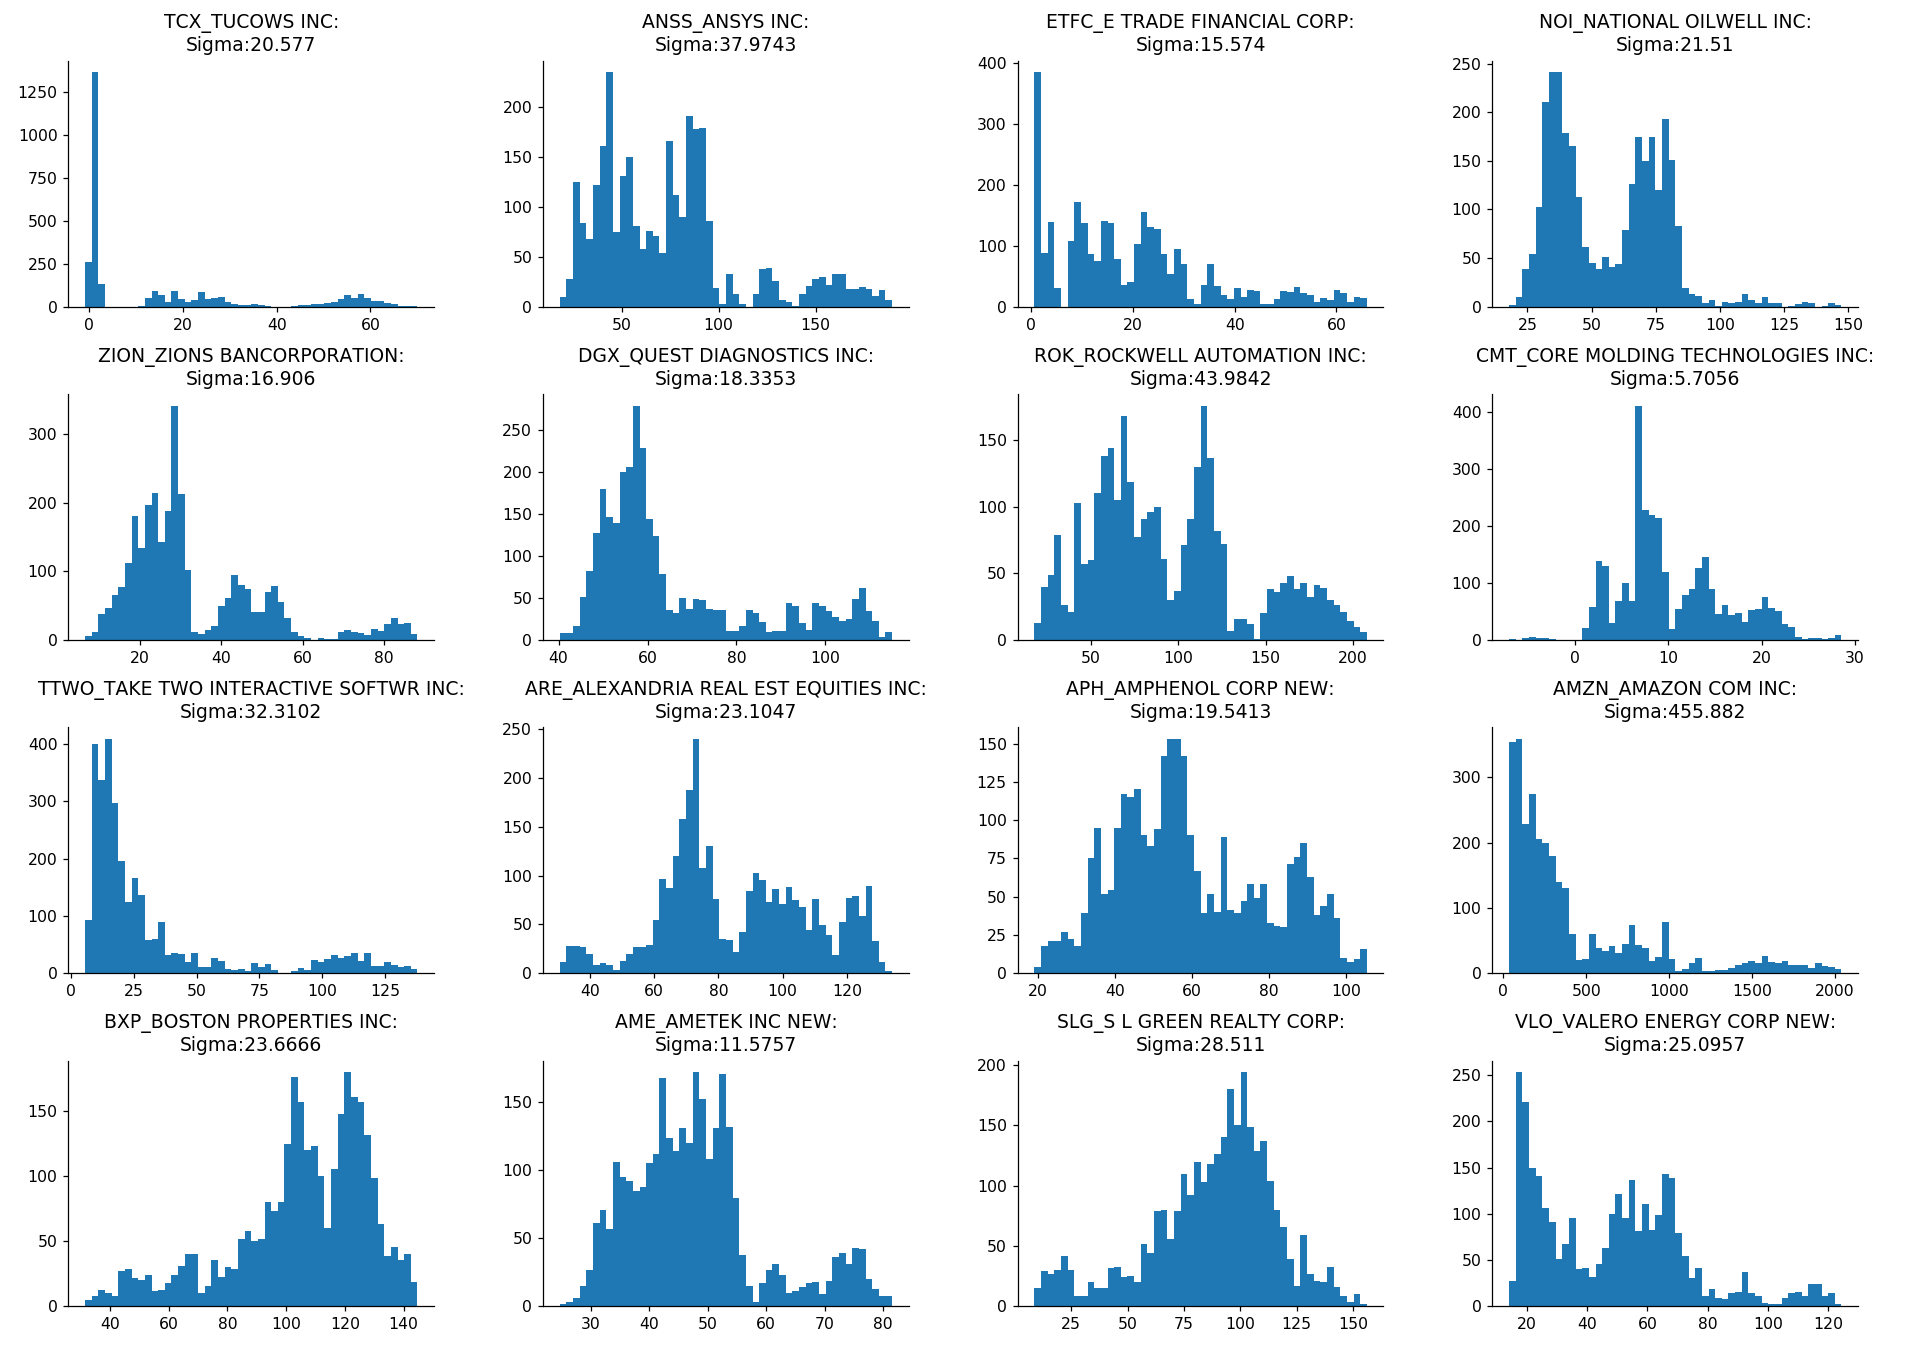









Batch 19


<IPython.core.display.Javascript object>


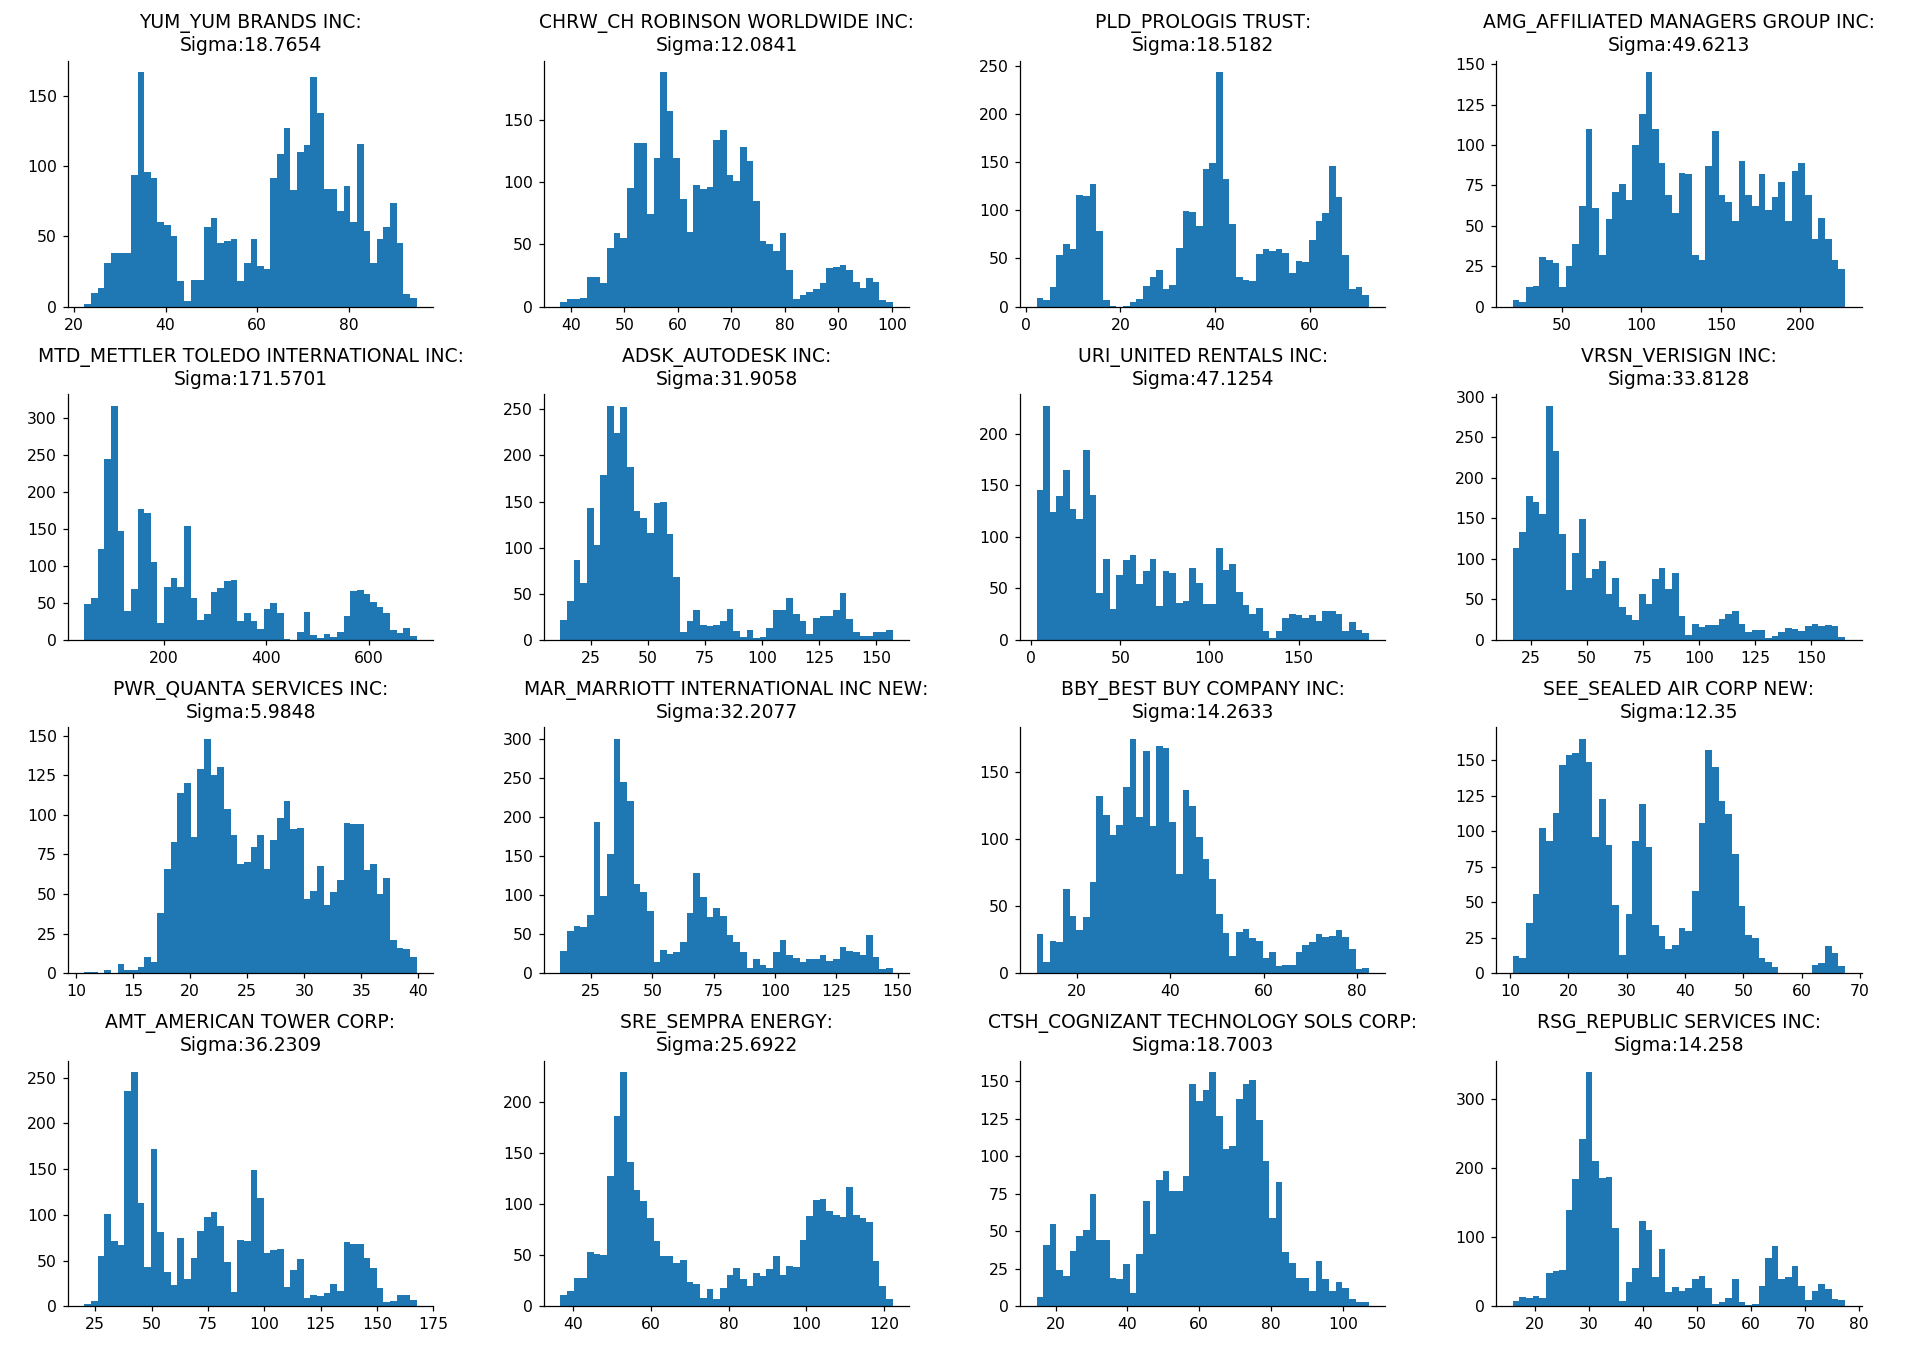









Batch 20


C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


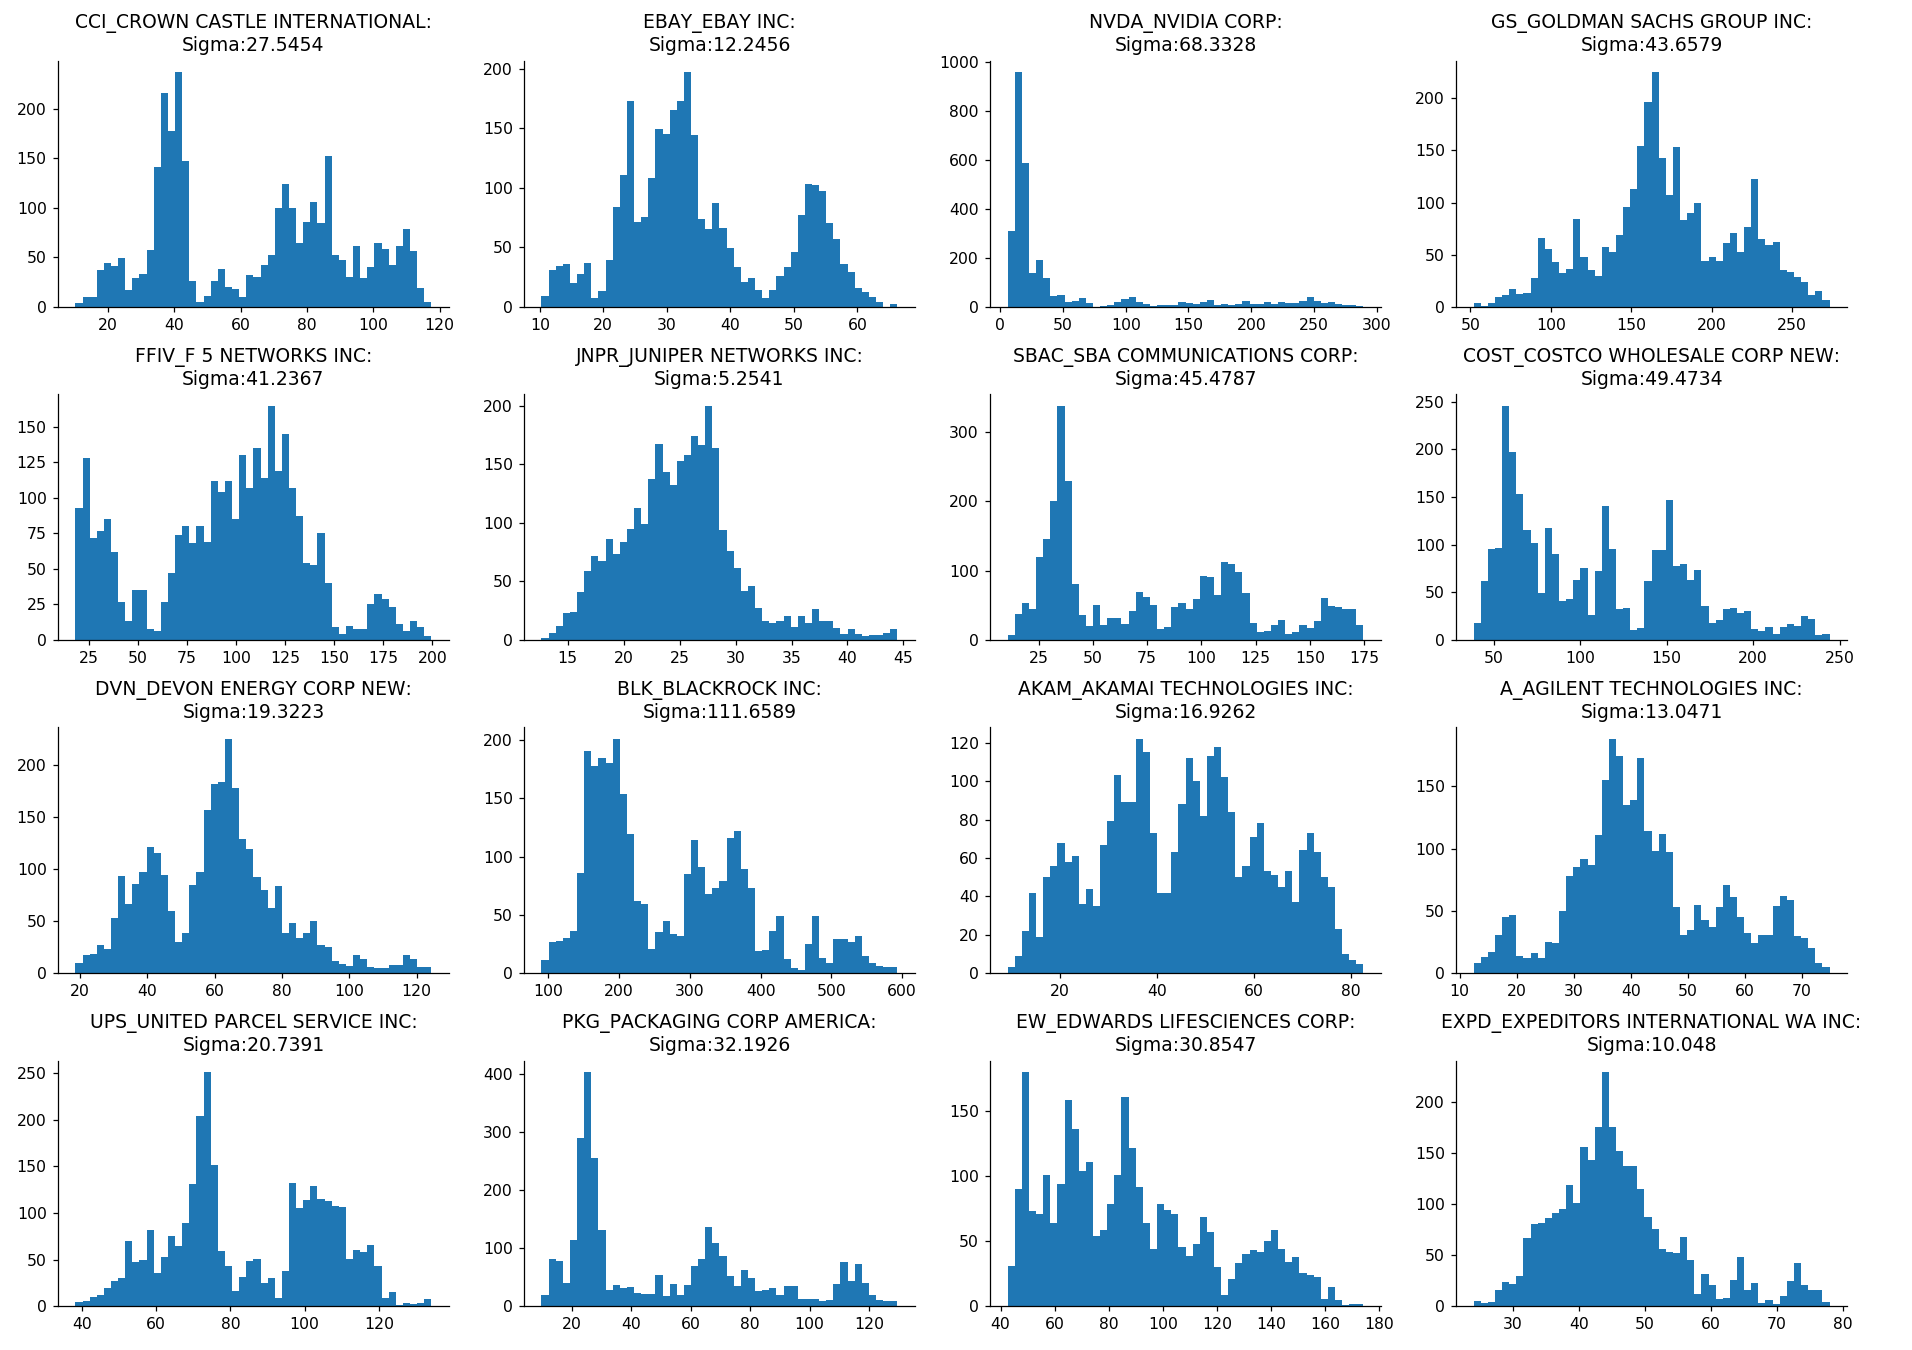









Batch 21


<IPython.core.display.Javascript object>


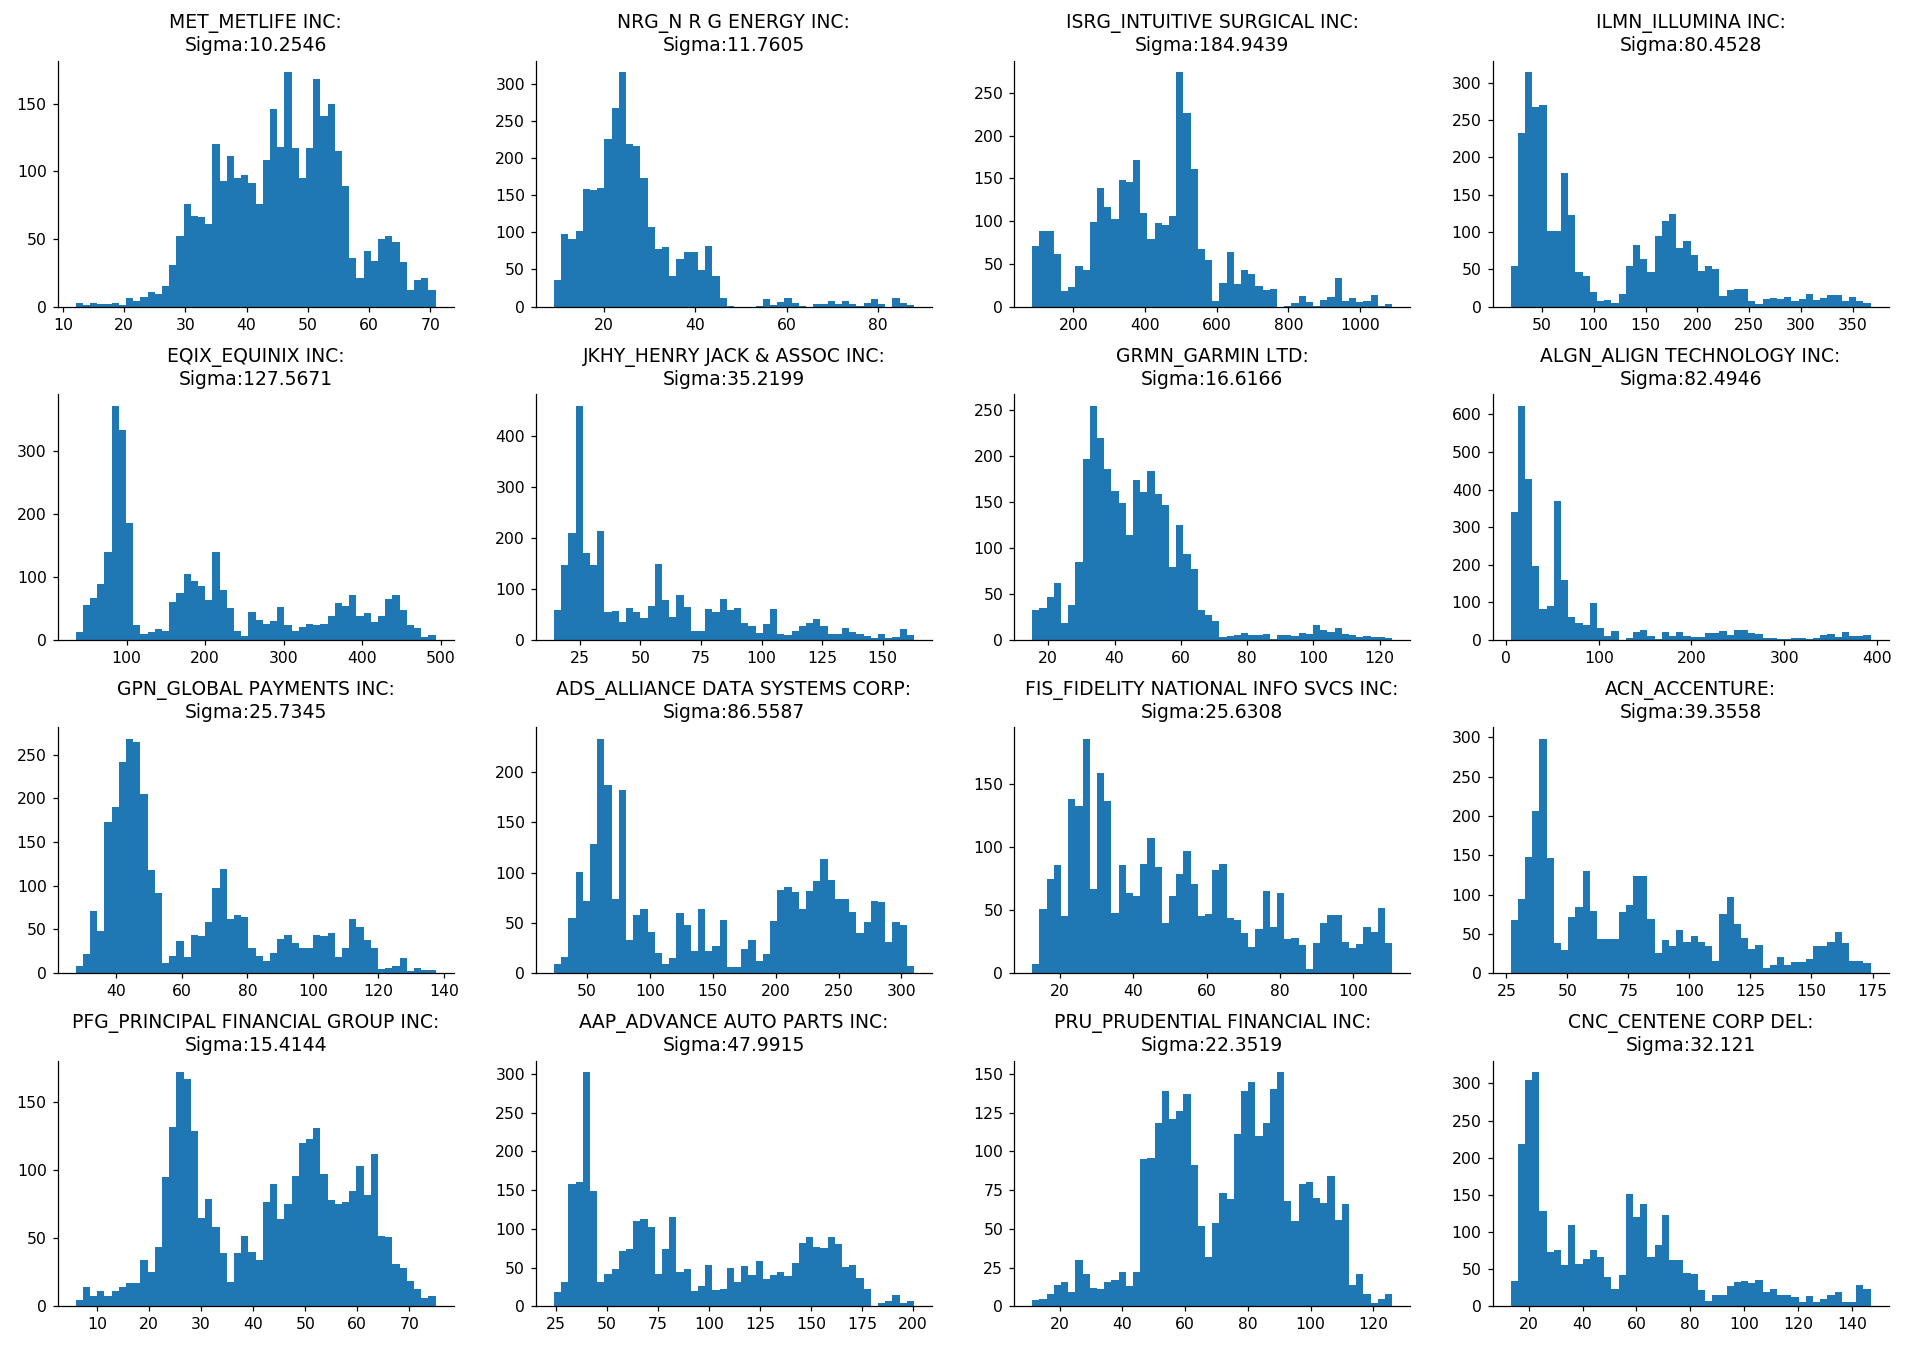









Batch 22


<IPython.core.display.Javascript object>


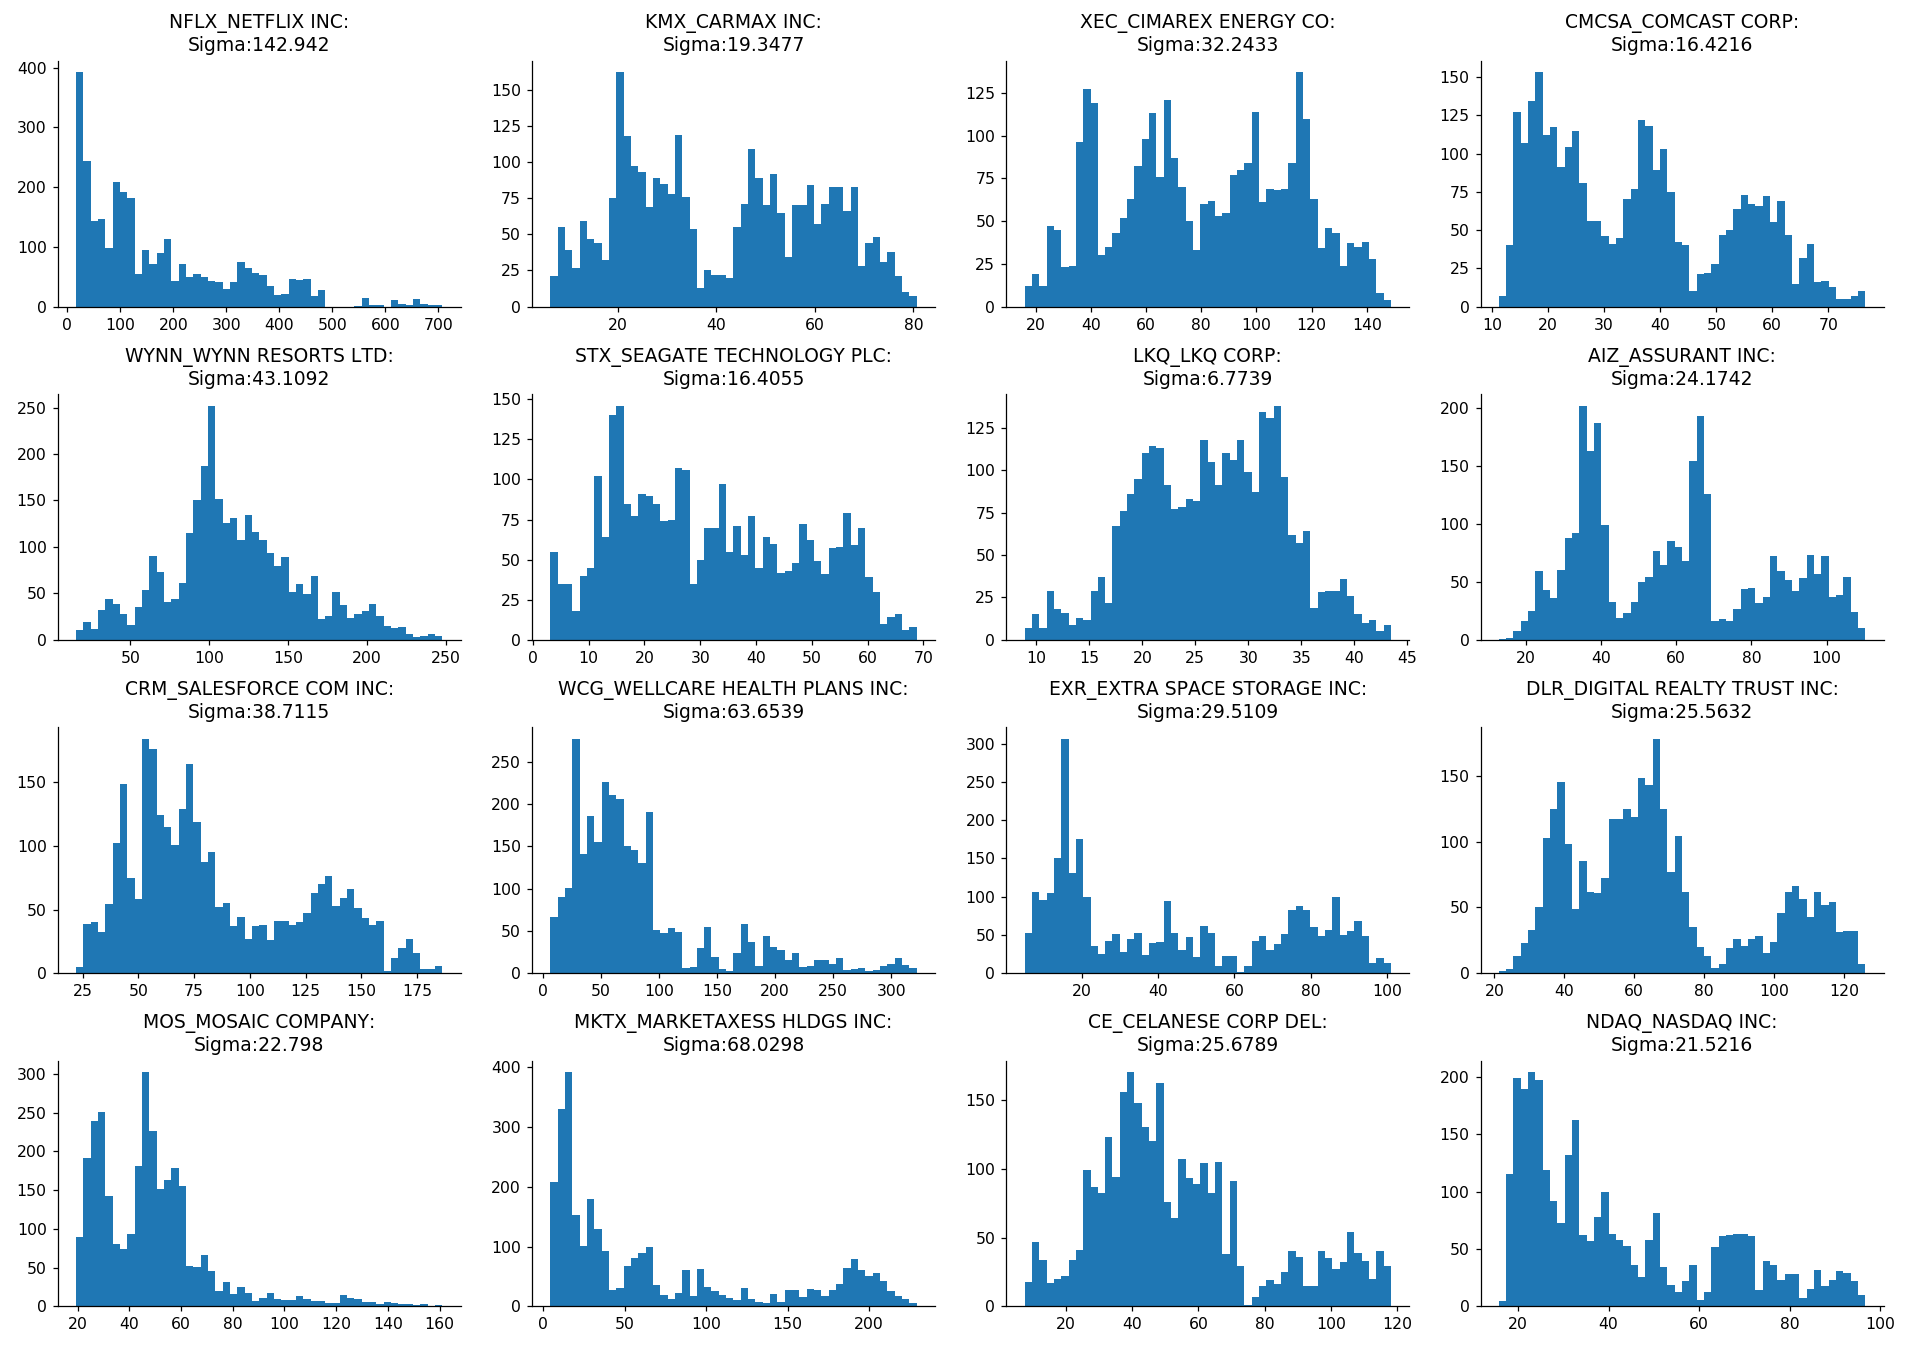









Batch 23


<IPython.core.display.Javascript object>


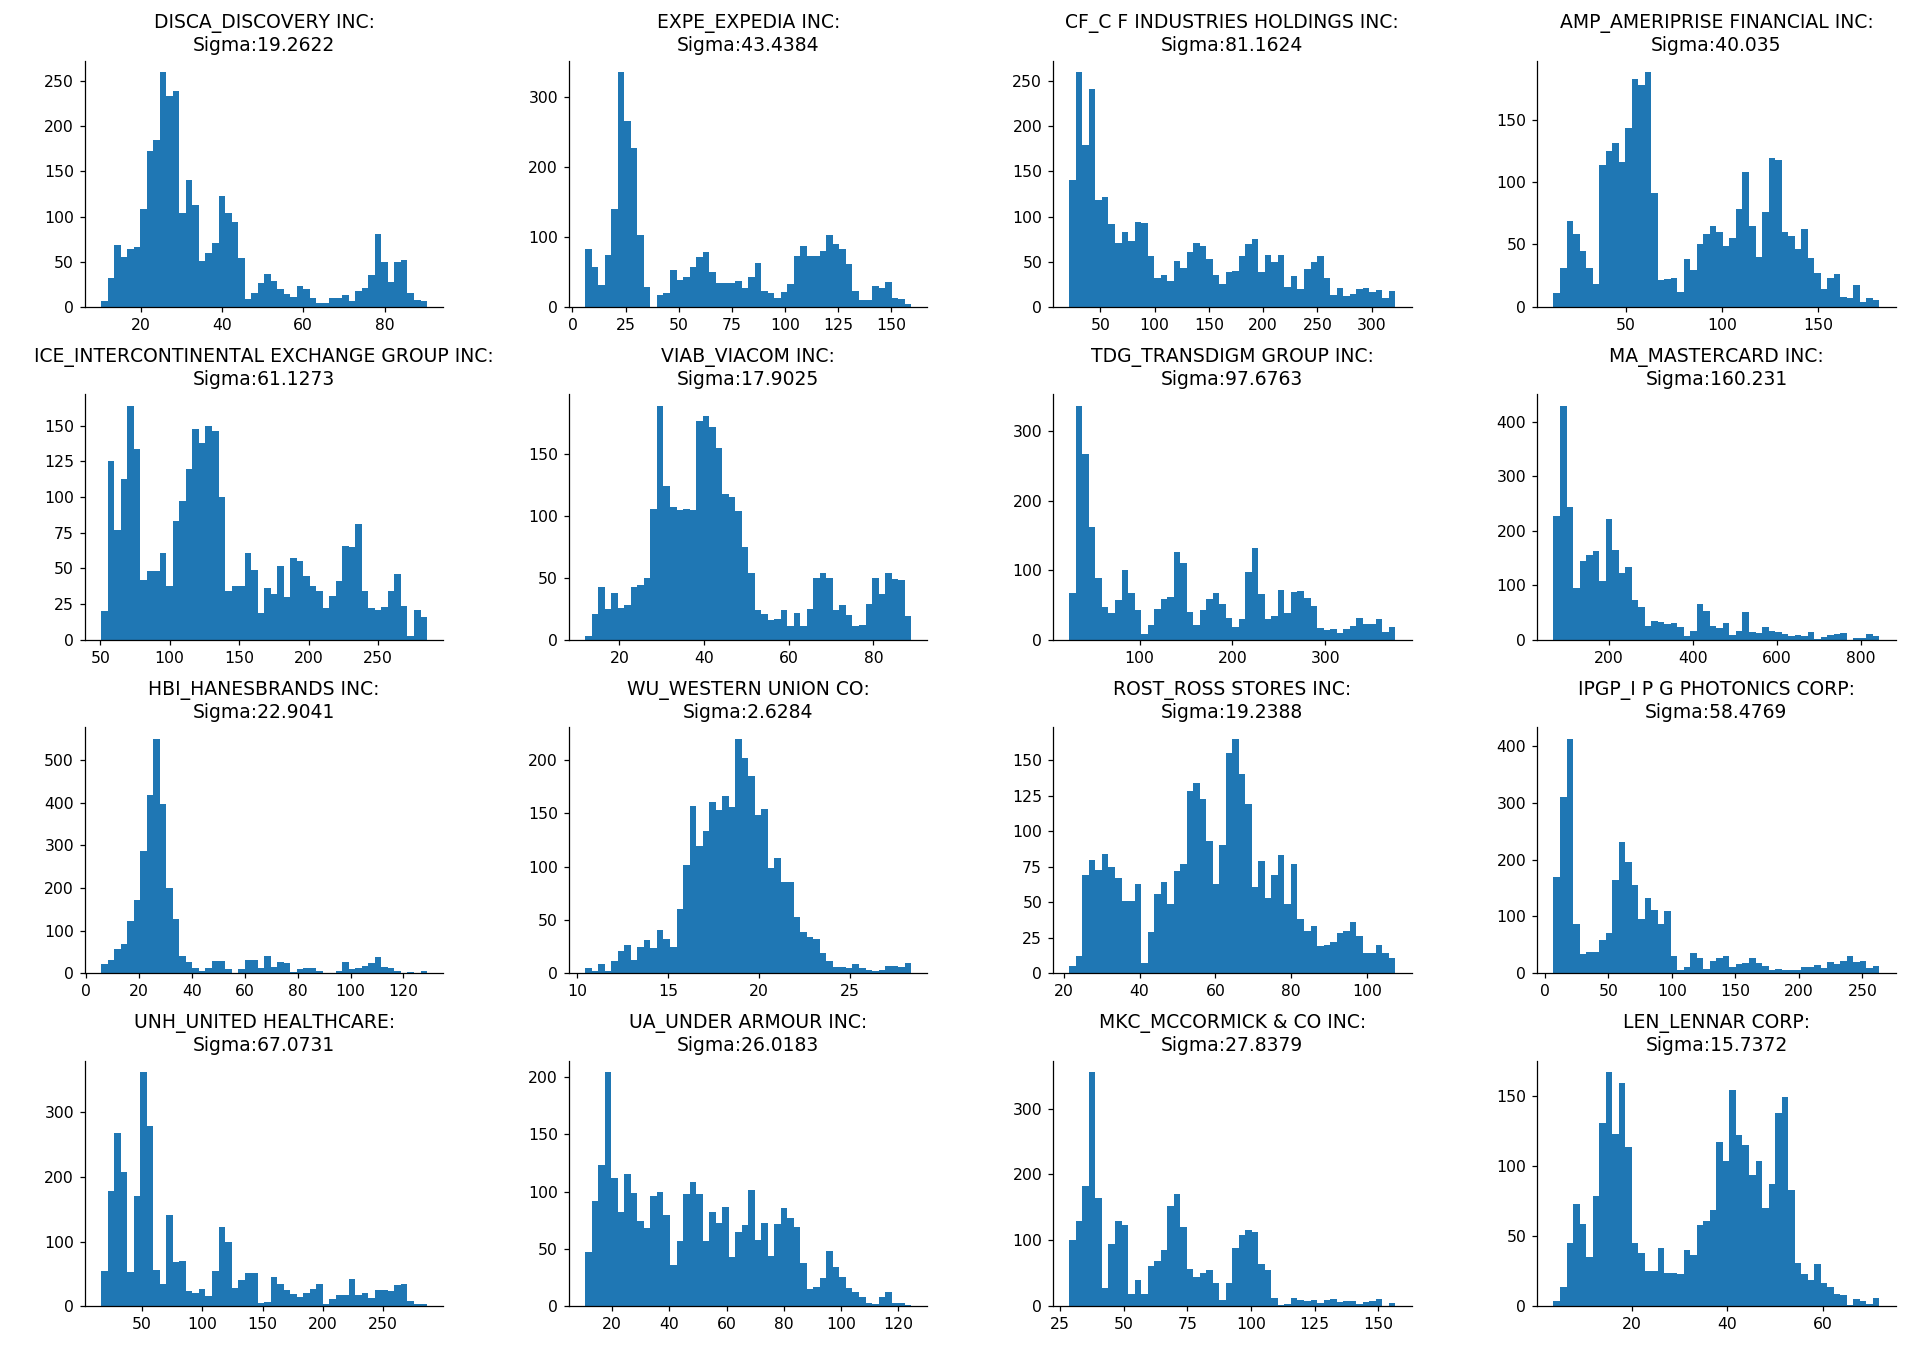

In [36]:
### matrix of subplots
n_cols = 4
n_rows = 4
n_plots = n_cols*n_rows
nloops = int(np.floor(388/n_plots))
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)
divisor = np.sqrt(3020)


for i in range(nloops):
    nn = len(df_price.columns)
    lower = i*n_plots
    upper = (i+1)*n_plots
    #print(lower, upper)
    temp_list = df_price.columns[lower:upper]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))    
    
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(17,12))
    for k in range(n_rows):
        for l in range(n_cols):
            ###--Generate Plot---## 
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            sigma = round(df_price[symbol].describe()['std'], 4)
            
            ##--Generate Plot--#        
            ax[k,l].hist(df_price[symbol], bins=50)
            ax[k,l].set_title('{}:\nSigma:{}'.format(symbol, sigma))
            #ax[k,l].set_ylim([0,1100])
            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
                        
    fig.subplots_adjust(hspace=0.7)
    plt.tight_layout()
    plt.show()

### leftovers

In [ ]:
### matrix of subplots
n_cols = 2
n_rows = 2
n_plots = n_cols*n_rows
nloops = 1
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)



for i in range(nloops):
    nn = len(df_returns.columns)
    #print(lower, upper)
    temp_list = df_price.columns[-n_plots:]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(10,6))
    for k in range(n_rows):
        for l in range(n_cols):
            ###--Generate Plot---## 
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### worst return, it's z-score and sigma value
            worst_return = df_price[symbol].sort_values()[0]

            sigma = round(df_returns[symbol].describe()['std'], 4)

                
            ##--Generate Plot--#        
            ax[k,l].hist(df_price[symbol], bins=50,color=temp_color)
            ax[k,l].set_title('{}\n:\nSigma:{}'.format(symbol, sigma))
            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)

    fig.subplots_adjust(hspace=0.7)
    plt.tight_layout()
    plt.show()   